<h2><center>California K-12 Public Schools</center></h2>
<h1><center>Meeting the Standards Projection</center></h1>


   <img src='images/istock_kids_stem_0.jpeg' width="900">
   
   **Credit:**  [natural start](https://naturalstart.org/feature-stories/engaging-children-stem-education-early)

In [1]:
# Load relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
import warnings

import folium  #needed for interactive map
from folium.plugins import HeatMap

sns.set(style='ticks')

warnings.filterwarnings("ignore")  # Suppress all warnings

# EXPLORATORY DATA ANALYSIS
## Model development dataset is ready for exploration

### Summary statistics
- Check individual variable distribution
    - Verify the spread of the data
    - May be able to infer the mean from distribution plots
    
### Review for outliers and anomalies
- Boxplots
    - Quick way to identify outliers or anomalous observations
    - Important to consider these in the context of the problem

In [2]:
# load datafiles

# dfs with number of students as values
df_language = pd.read_csv('data/df_language_clean')
df_math = pd.read_csv('data/df_math_clean')

# dfs with percentage of students as values
language = pd.read_csv('data/language_with_percentage_values')
math = pd.read_csv('data/math_with_percentage_values')

In [3]:
#language.head()

In [4]:
# Summary statistics of columns of interest - table uses df_language which has the values as count not percentage
table = df_language[['Median Household Income', 'CAASPP Reported Enrollment',
       'Enrollment K-12', 'Total Revenue per Pupil',
       'Total Expenditures per Pupil', 'Free Meal Count K-12',
       'Current Expense Per ADA', 'Male', 'Female', 'Military', 'Non Military',
       'Homeless', 'Non Homeless', 'Disadvantaged', 'Not Disadvantaged',
       'Black', 'Native American', 'Asian', 'Hispanic', 'Pacific Islander',
       'White', 'Two/More Races', '< High School', 'High School Grad',
       'Some College', 'College Grad', 'Graduate School',
       'Percentage Standard Met and Above']]

table.describe().T.apply(lambda s: s.apply('{0:.2f}'.format)) #lambda function suppress scientific notation

count      mean       std       min  \
Median Household Income            9646.00  62594.36  25278.66  11922.00   
CAASPP Reported Enrollment         9646.00    340.92    273.12     11.00   
Enrollment K-12                    9646.00    641.40    533.32      0.00   
Total Revenue per Pupil            9646.00  14506.12   3195.08    632.00   
Total Expenditures per Pupil       9646.00  14494.85   3352.22    490.00   
Free Meal Count K-12               9646.00    336.84    311.58      0.00   
Current Expense Per ADA            9646.00  13592.73   4798.39   7970.70   
Male                               9646.00    174.28    138.89     -1.00   
Female                             9646.00    166.58    135.48     -1.00   
Military                           9646.00      3.25     16.36     -1.00   
Non Military                       9646.00    337.33    270.77      5.00   
Homeless                           9646.00     11.68     24.50     -1.00   
Non Homeless                       9646.00    328.45    266.12     -1.00   
Disadvantaged                      9646.00    207.42    193.57     -1.00   
Not Disadvantaged                  9646.00    133.36    174.65     -1.00   
Black                              9646.00     17.52     31.95     -1.00   
Native American                    9646.00      0.62      5.21     -1.00   
Asian                              9646.00     30.90     72.81     -1.00   
Hispanic                           9646.00    186.80    186.97     -1.00   
Pacific Islander                   9646.00      0.64      3.47     -1.00   
White                              9646.00     77.17    113.70     -1.00   
Two/More Races                     9646.00     12.80     20.58     -1.00   
< High School                      9646.00     49.99     68.95     -1.00   
High School Grad                   9646.00     70.74     69.53     -1.00   
Some College                       9646.00     69.06     68.73     -1.00   
College Grad                       9646.00     65.46     80.60     -1.00   
Graduate School                    9646.00     46.50     82.60     -1.00   
Percentage Standard Met and Above  9646.00     47.75     20.65      0.00   

                                        25%       50%       75%        max  
Median Household Income            43526.00  56671.00  77080.75  236912.00  
CAASPP Reported Enrollment           169.00    280.00    424.00    3665.00  
Enrollment K-12                      351.00    530.00    750.00    6324.00  
Total Revenue per Pupil            13068.00  14107.00  15411.00  106533.00  
Total Expenditures per Pupil       12937.00  14225.00  15700.00   99133.00  
Free Meal Count K-12                 120.00    266.00    453.00    3863.00  
Current Expense Per ADA            11860.86  12983.99  14218.36  126344.42  
Male                                  87.00    144.00    217.00    1818.00  
Female                                82.00    136.00    207.75    1847.00  
Military                               0.00      0.00      0.00     408.00  
Non Military                         167.00    277.00    419.00    3532.00  
Homeless                              -1.00      4.00     13.00     400.00  
Non Homeless                         160.00    268.00    407.00    3507.00  
Disadvantaged                         68.00    159.00    284.75    1776.00  
Not Disadvantaged                     25.00     69.00    180.00    1889.00  
Black                                  0.00      6.00     21.00     369.00  
Native American                       -1.00      0.00      0.00     272.00  
Asian                                  0.00      7.00     27.00    1042.00  
Hispanic                              54.00    135.00    257.00    1727.00  
Pacific Islander                      -1.00      0.00      0.00      60.00  
White                                  9.00     33.00    105.00    1652.00  
Two/More Races                         0.00      6.00     18.00     422.00  
< High School                          7.00     26.00     67.

In [5]:
#math.head()

In [6]:
# # Summary statistics of columns of interest - table1 uses df_language which has the values as count not percentage
# table1 = df_math[['Median Household Income', 'CAASPP Reported Enrollment',
#        'Enrollment K-12', 'Total Revenue per Pupil',
#        'Total Expenditures per Pupil', 'Free Meal Count K-12',
#        'Current Expense Per ADA', 'Male', 'Female', 'Military', 'Non Military',
#        'Homeless', 'Non Homeless', 'Disadvantaged', 'Not Disadvantaged',
#        'Black', 'Native American', 'Asian', 'Hispanic', 'Pacific Islander',
#        'White', 'Two/More Races', '< High School', 'High School Grad',
#        'Some College', 'College Grad', 'Graduate School',
#        'Percentage Standard Met and Above']]

# table1.describe().T.apply(lambda s: s.apply('{0:.2f}'.format)) #lambda function suppress scientific notation

## Variables Distribution

The distribution of a variable is a description of the relative numbers of times each possible outcome occurs.

### Language Art & Literature Dataset

In [7]:
def distribution_plot(df, var):
    # Distribution plot
    plt.figure(figsize=(7,5))
    sns.distplot(df[var])
    plt.title(var, fontsize = 16)

    # Adding labels
    _ = plt.xlabel('% Students', fontsize=16)
    _ = plt.ylabel('Density', fontsize=16)

    plt.show()

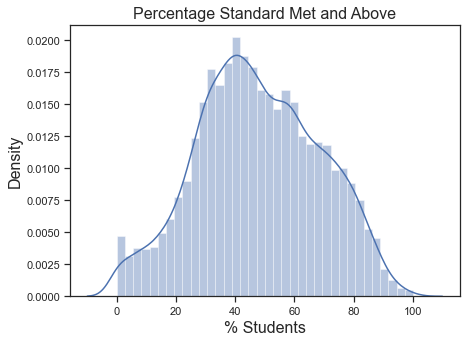

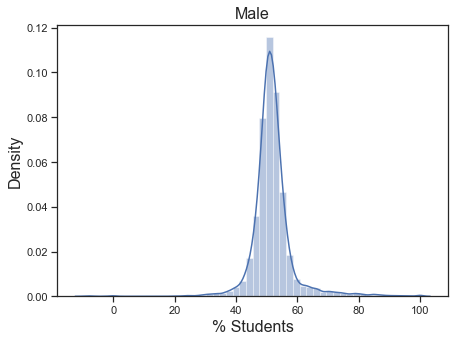

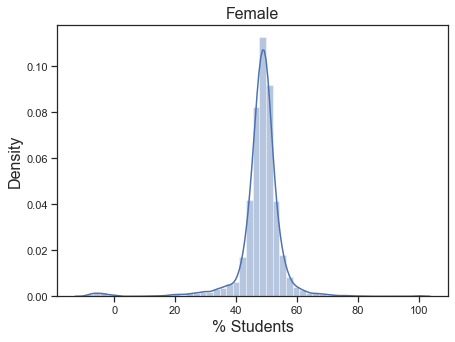

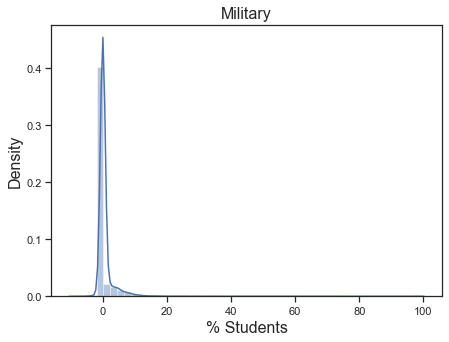

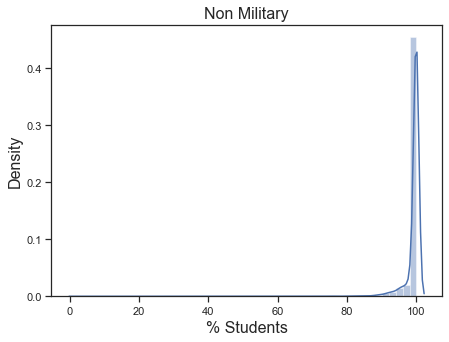

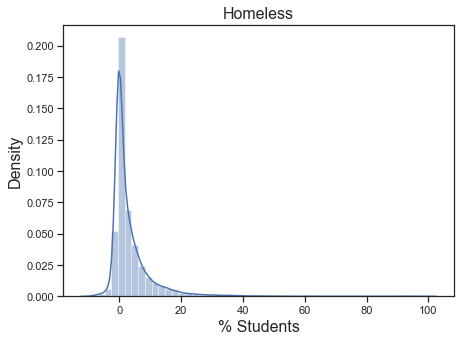

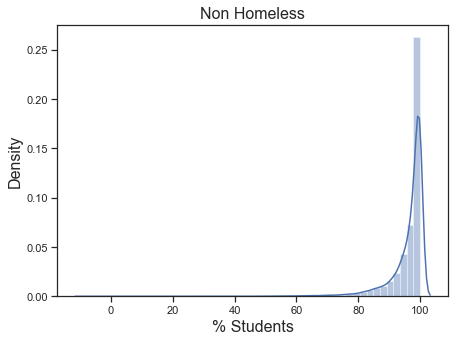

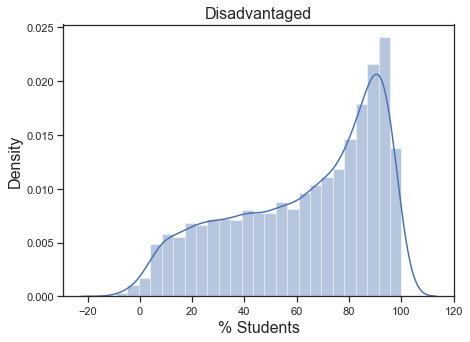

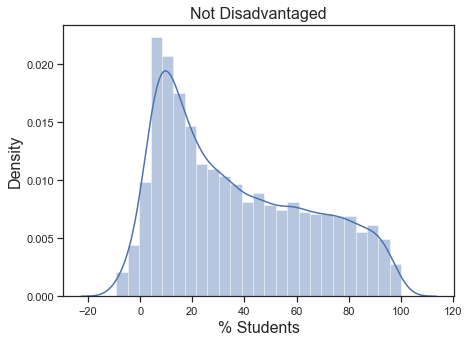

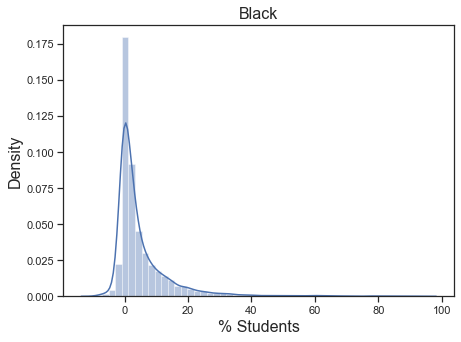

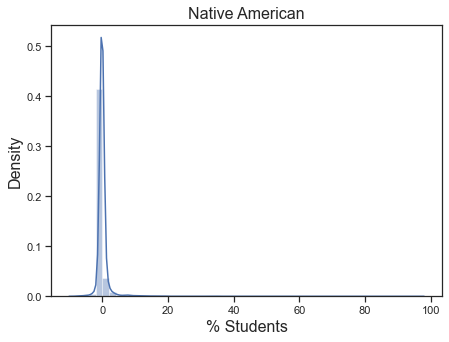

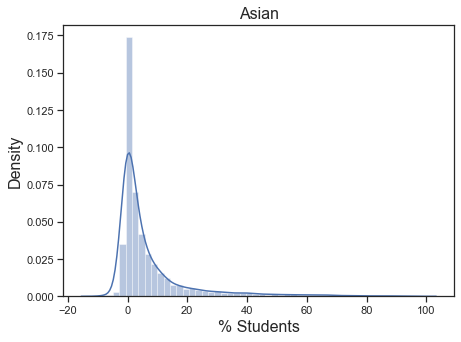

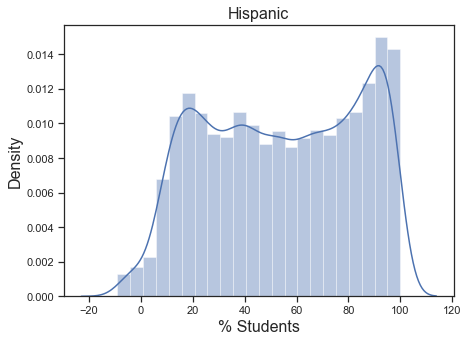

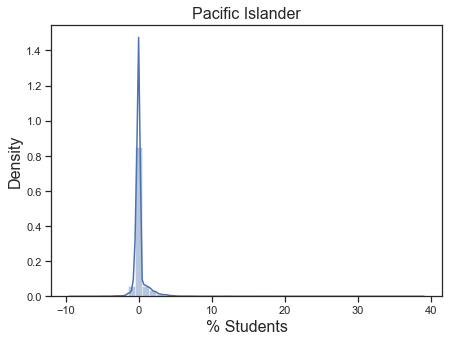

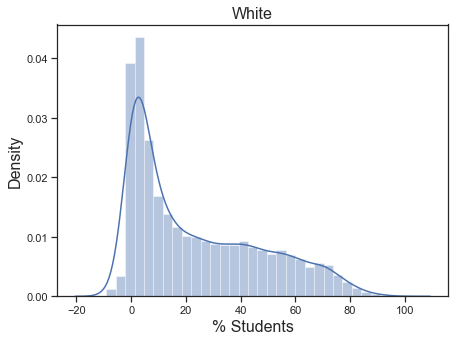

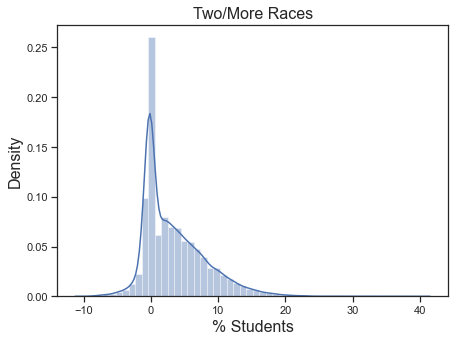

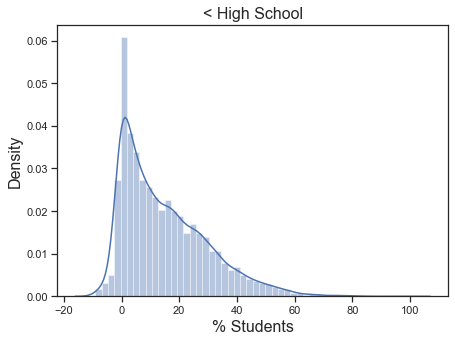

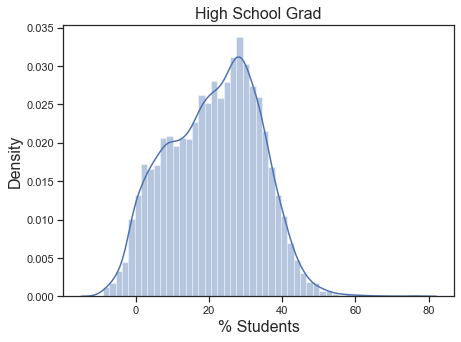

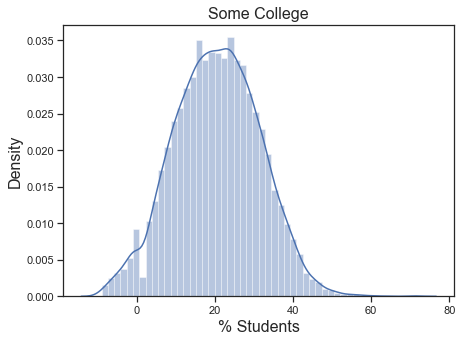

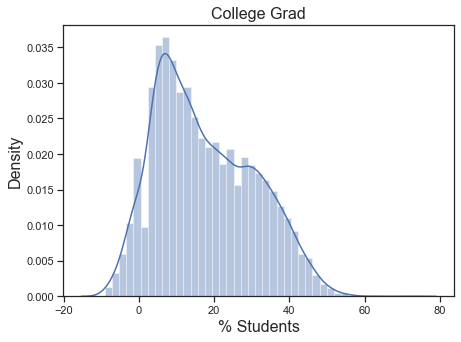

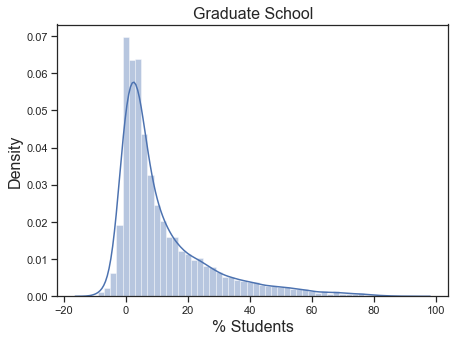

In [8]:
variables = ['Percentage Standard Met and Above', 'Male', 'Female', 'Military', 'Non Military', 'Homeless', 'Non Homeless',
       'Disadvantaged', 'Not Disadvantaged', 'Black', 'Native American', 'Asian', 'Hispanic',
       'Pacific Islander', 'White', 'Two/More Races', '< High School',
       'High School Grad', 'Some College', 'College Grad', 'Graduate School']

for var in variables:
    distribution_plot(language, var)

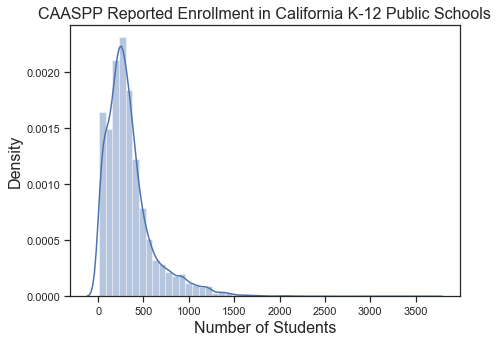

In [9]:
# Distribution plot
plt.figure(figsize=(7,5))
sns.distplot(language['CAASPP Reported Enrollment'])
plt.title('CAASPP Reported Enrollment in California K-12 Public Schools', fontsize = 16)

# Adding labels
_ = plt.xlabel('Number of Students', fontsize=16)
_ = plt.ylabel('Density', fontsize=16)

plt.show()

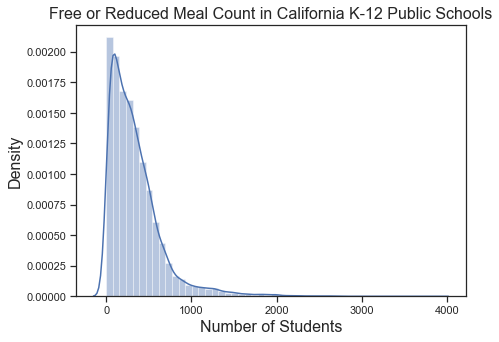

In [10]:
# Distribution plot
plt.figure(figsize=(7,5))
sns.distplot(language['Free Meal Count K-12'])
plt.title('Free or Reduced Meal Count in California K-12 Public Schools', fontsize = 16)

# Adding labels
_ = plt.xlabel('Number of Students', fontsize=16)
_ = plt.ylabel('Density', fontsize=16)

plt.show()

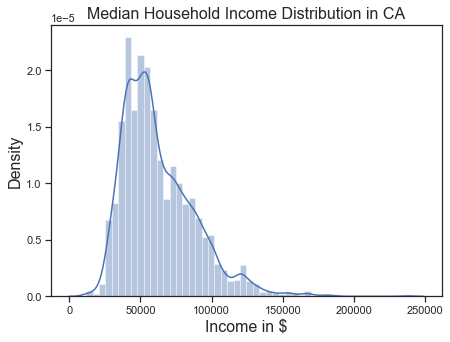

In [11]:
# Distribution plot
plt.figure(figsize=(7,5))
sns.distplot(language['Median Household Income'])
plt.title('Median Household Income Distribution in CA', fontsize = 16)

# Adding labels
_ = plt.xlabel('Income in $', fontsize=16)
_ = plt.ylabel('Density', fontsize=16)

plt.show()

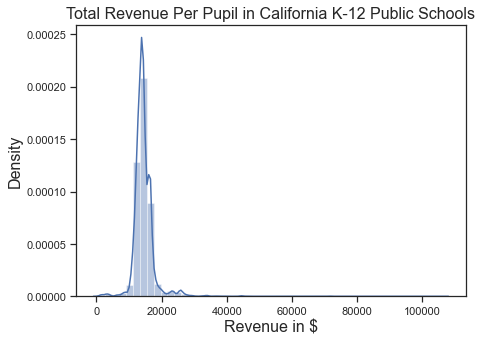

In [12]:
# Distribution plot
plt.figure(figsize=(7,5))
sns.distplot(language['Total Revenue per Pupil'])
plt.title('Total Revenue Per Pupil in California K-12 Public Schools', fontsize = 16)

# Adding labels
_ = plt.xlabel('Revenue in $', fontsize=16)
_ = plt.ylabel('Density', fontsize=16)

plt.show()

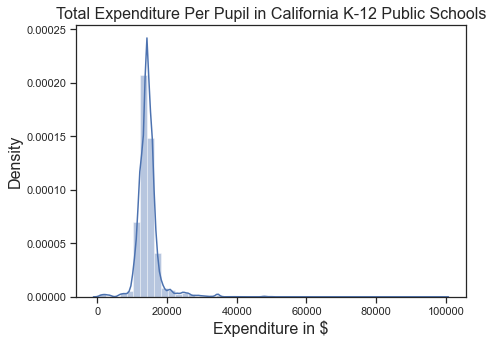

In [13]:
# Distribution plot
plt.figure(figsize=(7,5))
sns.distplot(language['Total Expenditures per Pupil'])
plt.title('Total Expenditure Per Pupil in California K-12 Public Schools', fontsize = 16)

# Adding labels
_ = plt.xlabel('Expenditure in $', fontsize=16)
_ = plt.ylabel('Density', fontsize=16)

plt.show()

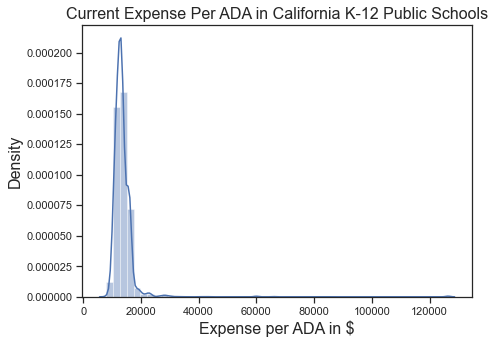

In [14]:
# Distribution plot
plt.figure(figsize=(7,5))
sns.distplot(language['Current Expense Per ADA'])
plt.title('Current Expense Per ADA in California K-12 Public Schools', fontsize = 16)

# Adding labels
_ = plt.xlabel('Expense per ADA in $', fontsize=16)
_ = plt.ylabel('Density', fontsize=16)

plt.show()  

Text(13.304100000000005, 0.5, 'Density')

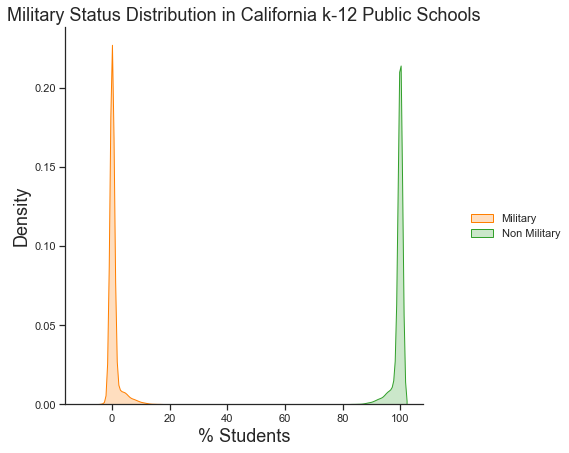

In [15]:
# subset features of interest
mil = language[['Military', 'Non Military']]

# plot
_ = sns.displot(mil, kind="kde", fill=True, palette="Paired_r")
_.fig.set_size_inches(8,6)
plt.title("Military Status Distribution in California k-12 Public Schools", fontsize=18)
plt.xlabel('% Students', fontsize=18)
plt.ylabel('Density', fontsize=18)

Text(14.602600000000002, 0.5, 'Density')

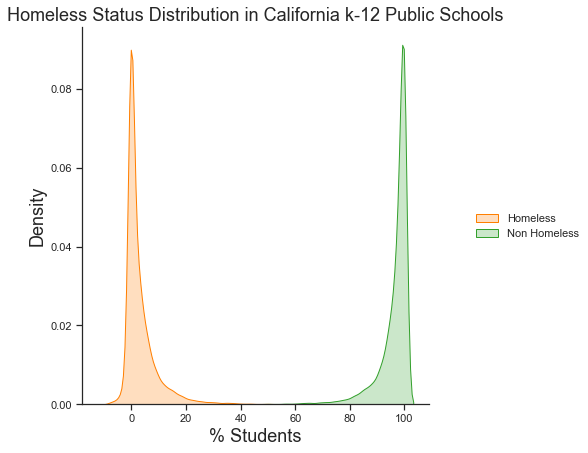

In [16]:
# subset features
hom = language[['Homeless', 'Non Homeless']]

# plot
_ = sns.displot(hom, kind="kde", fill=True, palette="Paired_r")
_.fig.set_size_inches(8,6)
plt.title("Homeless Status Distribution in California k-12 Public Schools", fontsize=18)
plt.xlabel('% Students', fontsize=18)
plt.ylabel('Density', fontsize=18)

Text(10.771016666666675, 0.5, 'Density')

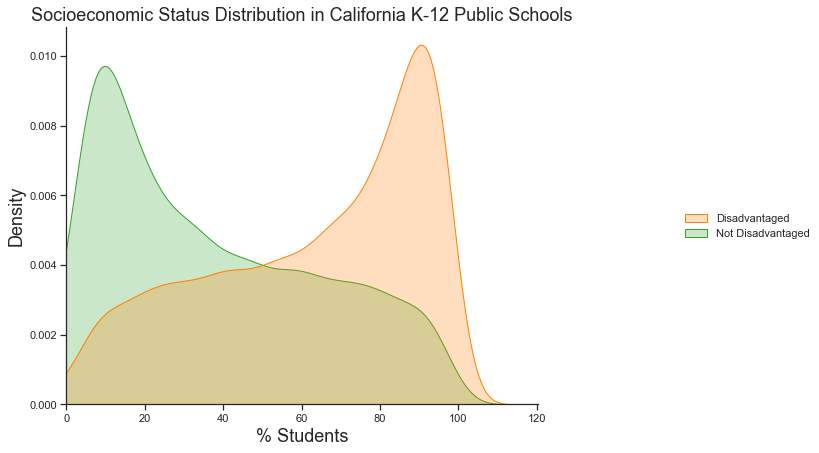

In [17]:
# subset feature of interest
econ = language[['Disadvantaged', 'Not Disadvantaged']]

# plot
_ = sns.displot(econ, kind="kde", fill=True, palette='Paired_r')
_.fig.set_size_inches(12,6)
plt.title("Socioeconomic Status Distribution in California K-12 Public Schools", fontsize=18)
plt.xlabel('% Students', fontsize=18)
plt.xlim(xmin=0)
plt.ylabel('Density', fontsize=18)

<Figure size 864x576 with 0 Axes>

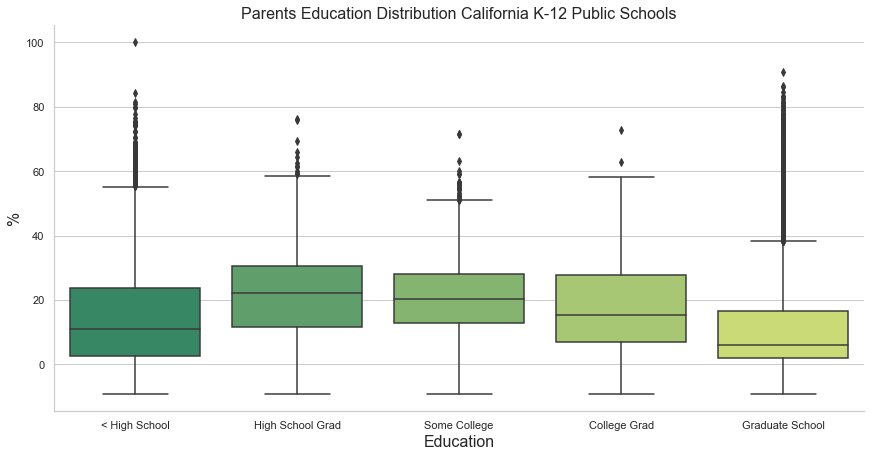

In [18]:
# Subset columns of interest
boxplot1 = language[['< High School', 'High School Grad','Some College', 'College Grad', 'Graduate School']]

# Plot distribution
plt.figure(figsize=(12,8))
sns.set_theme(style="whitegrid")
sns.catplot(data=boxplot1, kind="box", height=6, aspect=2, palette="summer")
_ = plt.title('Parents Education Distribution California K-12 Public Schools', fontsize=16)
_ = plt.xlabel('Education', fontsize=16)
_ = plt.ylabel('%', fontsize=16)

<Figure size 864x576 with 0 Axes>

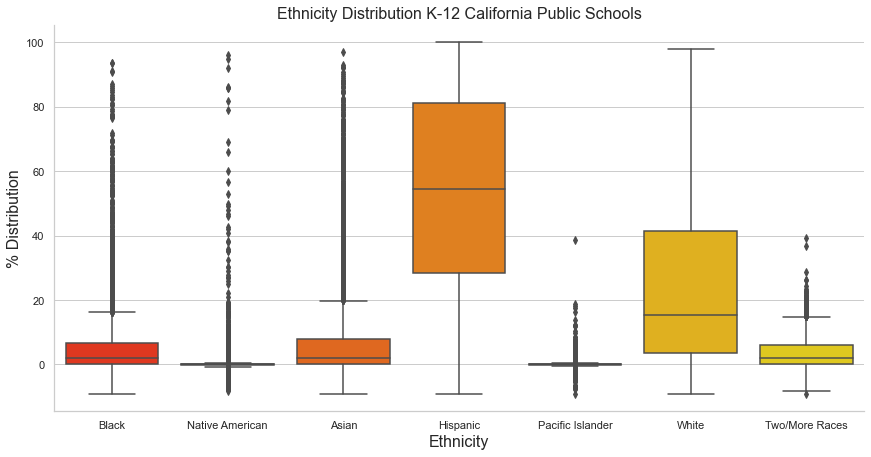

In [19]:
# Subset columns of interest
boxplot = language[['Black', 'Native American', 'Asian', 'Hispanic', 'Pacific Islander', 'White', 'Two/More Races']]

# Plot ethnicity distribution
plt.figure(figsize=(12,8))
sns.set_theme(style="whitegrid")
sns.catplot(data=boxplot, kind="box", height=6, aspect=2, palette='autumn')
_ = plt.title('Ethnicity Distribution K-12 California Public Schools', fontsize=16)
_ = plt.xlabel('Ethnicity', fontsize=16)
_ = plt.ylabel('% Distribution', fontsize=16)


------------

# In depth analysis of the following variables:

1. Median Income
2. Revenue per Pupil
3. Expenditure per Pupil
4. Expense per ADA

## 1. Median Income



### High income zip codes investigation:



    - There are 223 schools in zip codes where the median income per household is higher than $125,000.

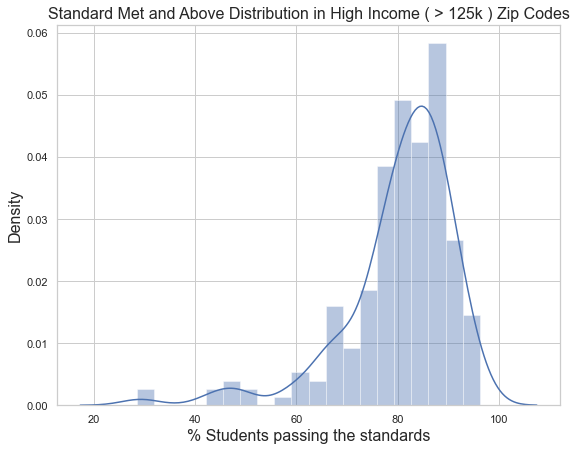

In [20]:
# Filtering income higher than 155k
high_income = language[language['Median Household Income'] > 125000]

# Distribution plot
plt.figure(figsize=(9,7))
sns.distplot(high_income['Percentage Standard Met and Above'])
plt.title('Standard Met and Above Distribution in High Income ( > 125k ) Zip Codes', fontsize = 16)

# Adding labels
_ = plt.xlabel('% Students passing the standards', fontsize=16)
_ = plt.ylabel('Density', fontsize=16)

plt.show()

<Figure size 864x576 with 0 Axes>

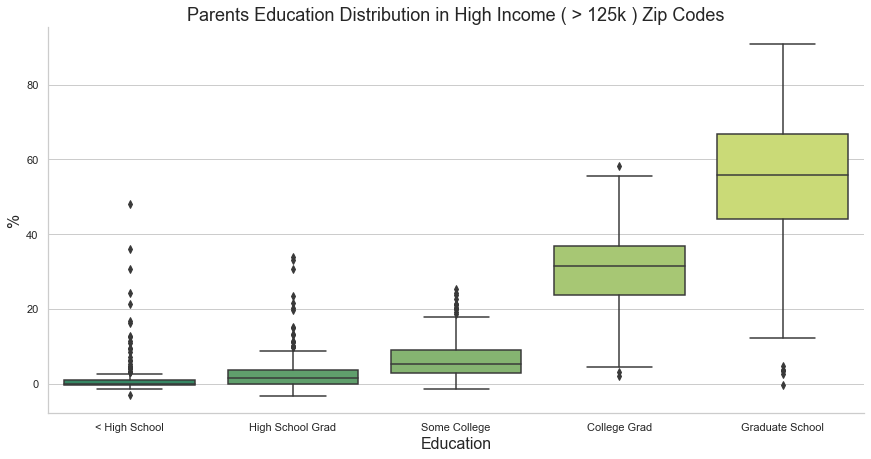

In [21]:
# Subset columns of interest
boxplot0 = high_income[['< High School', 'High School Grad','Some College', 'College Grad', 'Graduate School']]

# Plot distribution
plt.figure(figsize=(12,8))
sns.set_theme(style="whitegrid")
sns.catplot(data=boxplot0, kind="box", height=6, aspect=2, palette="summer")
_ = plt.title('Parents Education Distribution in High Income ( > 125k ) Zip Codes', fontsize=18)
_ = plt.xlabel('Education', fontsize=16)
_ = plt.ylabel('%', fontsize=16)

<Figure size 864x576 with 0 Axes>

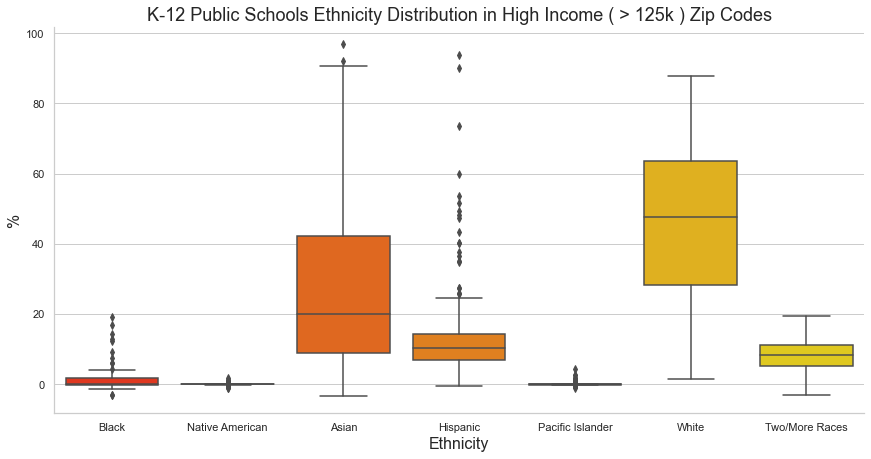

In [22]:
# Subset columns of interest
ethnicity_HI = high_income[['Black', 'Native American', 'Asian', 'Hispanic', 'Pacific Islander', 'White', 'Two/More Races']]

# Plot distribution
plt.figure(figsize=(12,8))
sns.set_theme(style="whitegrid")
sns.catplot(data=ethnicity_HI, kind="box", height=6, aspect=2, palette="autumn")
_ = plt.title('K-12 Public Schools Ethnicity Distribution in High Income ( > 125k ) Zip Codes', fontsize=18)
_ = plt.xlabel('Ethnicity', fontsize=16)
_ = plt.ylabel('%', fontsize=16)

### Low Income Zip Codes Investigation:


    - There are 370 schools in zip codes where the median income per household is lower than $30,000.

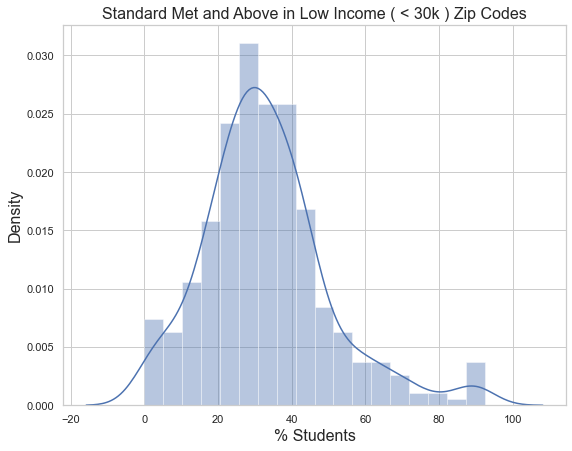

In [23]:
# Filtering income lower than 30k
low_income = language[language['Median Household Income'] < 30000]

# Distribution plot
plt.figure(figsize=(9,7))
sns.distplot(low_income['Percentage Standard Met and Above'])
plt.title('Standard Met and Above in Low Income ( < 30k ) Zip Codes', fontsize = 16)

# Adding labels
_ = plt.xlabel('% Students', fontsize=16)
_ = plt.ylabel('Density', fontsize=16)

plt.show()

<Figure size 864x576 with 0 Axes>

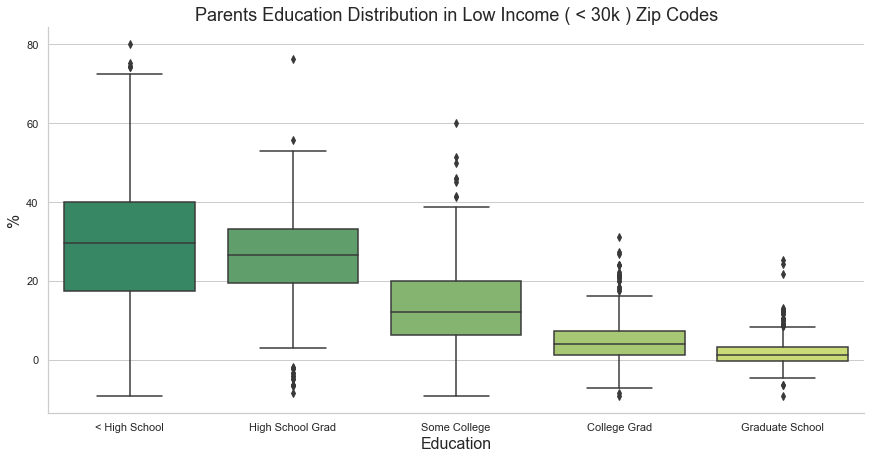

In [24]:
# Subset columns of interest
low0 = low_income[['< High School', 'High School Grad','Some College', 'College Grad', 'Graduate School']]

# Plot distribution
plt.figure(figsize=(12,8))
sns.set_theme(style="whitegrid")
sns.catplot(data=low0, kind="box", height=6, aspect=2, palette='summer')
_ = plt.title('Parents Education Distribution in Low Income ( < 30k ) Zip Codes', fontsize=18)
_ = plt.xlabel('Education', fontsize=16)
_ = plt.ylabel('%', fontsize=16)

<Figure size 864x576 with 0 Axes>

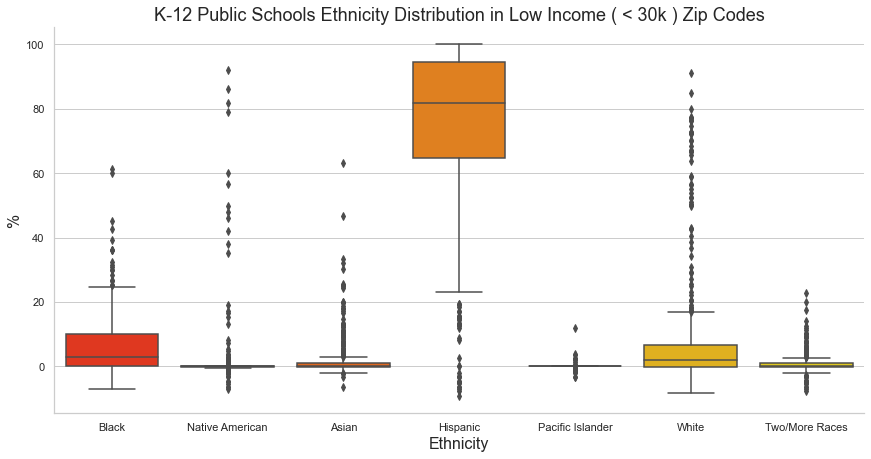

In [25]:
# Subset columns of interest
ethnicity_LO = low_income[['Black', 'Native American', 'Asian', 'Hispanic', 'Pacific Islander', 'White', 'Two/More Races']]

# Plot distribution
plt.figure(figsize=(12,8))
sns.set_theme(style="whitegrid")
sns.catplot(data=ethnicity_LO, kind="box", height=6, aspect=2, palette="autumn")
_ = plt.title('K-12 Public Schools Ethnicity Distribution in Low Income ( < 30k ) Zip Codes', fontsize=18)
_ = plt.xlabel('Ethnicity', fontsize=16)
_ = plt.ylabel('%', fontsize=16)

-----------

## 2. Revenue per Pupil


- **High Revenue Per Pupil Investigation:**


    - There are 334 schools with revenue per pupil higher than 20,000.



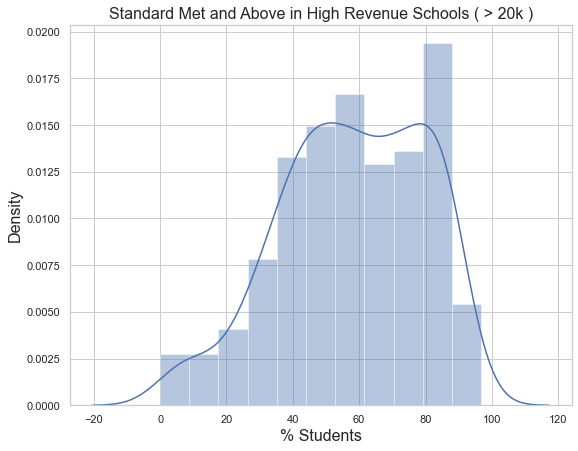

In [26]:
# Filtering total revenue per pupil higher than 20k
high_revenue = language[language['Total Revenue per Pupil'] > 20000]

# Distribution plot
plt.figure(figsize=(9,7))
sns.distplot(high_revenue['Percentage Standard Met and Above'])
plt.title('Standard Met and Above in High Revenue Schools ( > 20k )', fontsize = 16)

# Adding labels
_ = plt.xlabel('% Students', fontsize=16)
_ = plt.ylabel('Density', fontsize=16)

plt.show()

<Figure size 864x576 with 0 Axes>

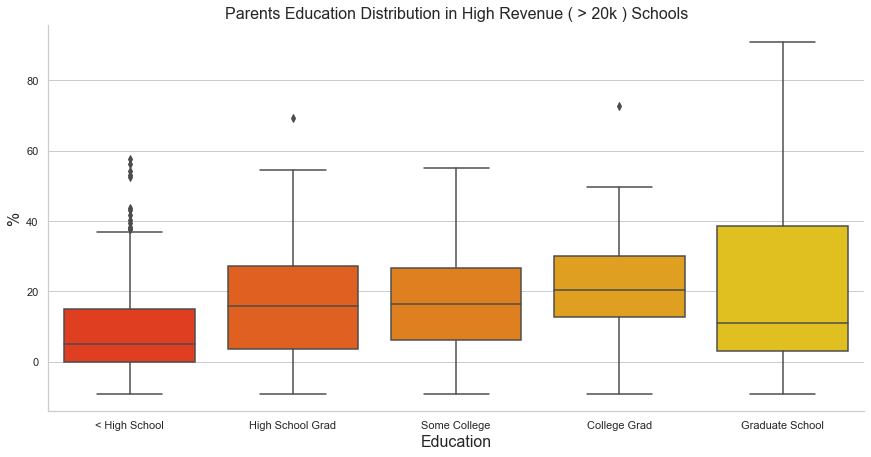

In [27]:
# Subset columns of interest
high0 = high_revenue[['< High School', 'High School Grad','Some College', 'College Grad', 'Graduate School']]

# Plot distribution
plt.figure(figsize=(12,8))
sns.set_theme(style="whitegrid")
sns.catplot(data=high0, kind="box", height=6, aspect=2, palette='autumn')
_ = plt.title('Parents Education Distribution in High Revenue ( > 20k ) Schools', fontsize=16)
_ = plt.xlabel('Education', fontsize=16)
_ = plt.ylabel('%', fontsize=16)

<Figure size 864x576 with 0 Axes>

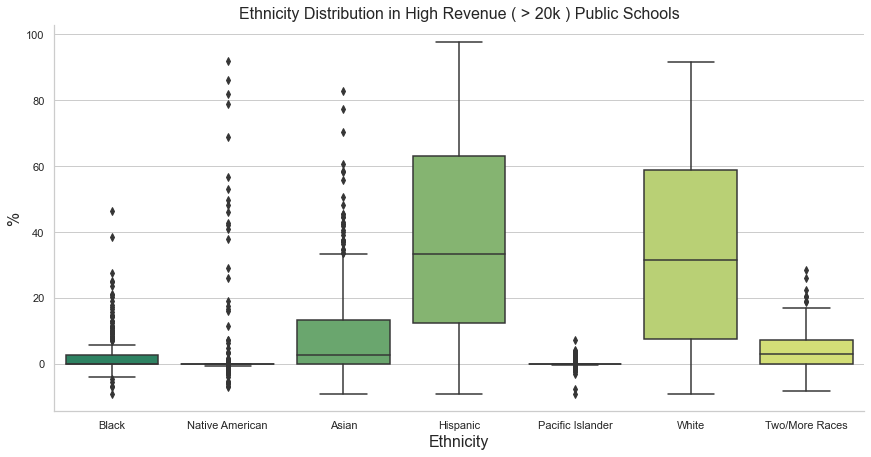

In [28]:
# Subset columns of interest
rev_high = high_revenue[['Black', 'Native American', 'Asian', 'Hispanic', 'Pacific Islander', 'White', 'Two/More Races']]

# Plot distribution
plt.figure(figsize=(12,8))
sns.set_theme(style="whitegrid")
sns.catplot(data=rev_high, kind="box", height=6, aspect=2, palette="summer")
_ = plt.title('Ethnicity Distribution in High Revenue ( > 20k ) Public Schools', fontsize=16)
_ = plt.xlabel('Ethnicity', fontsize=16)
_ = plt.ylabel('%', fontsize=16)

--------

## 3. Expenditure per Pupil


- **High Expenditure Per Pupil Investigation:**


    - There are 373 schools with expenditure per pupil higher than 20,000.



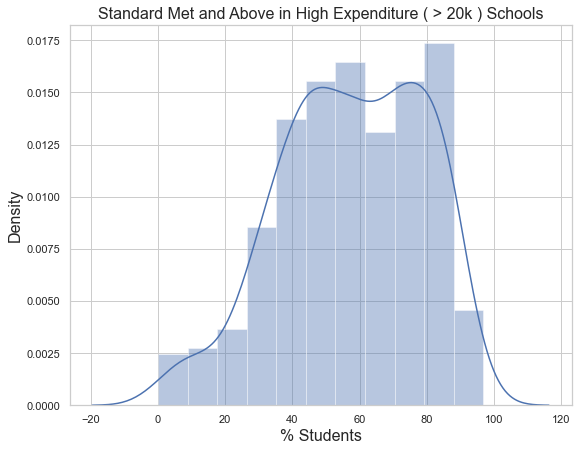

In [29]:
# Filtering total expenditure per pupil higher than 20k
high_expenditure = language[language['Total Expenditures per Pupil'] > 20000]

# Distribution plot
plt.figure(figsize=(9,7))
sns.distplot(high_expenditure['Percentage Standard Met and Above'])
plt.title('Standard Met and Above in High Expenditure ( > 20k ) Schools', fontsize = 16)

# Adding labels
_ = plt.xlabel('% Students', fontsize=16)
_ = plt.ylabel('Density', fontsize=16)

plt.show()

<Figure size 864x576 with 0 Axes>

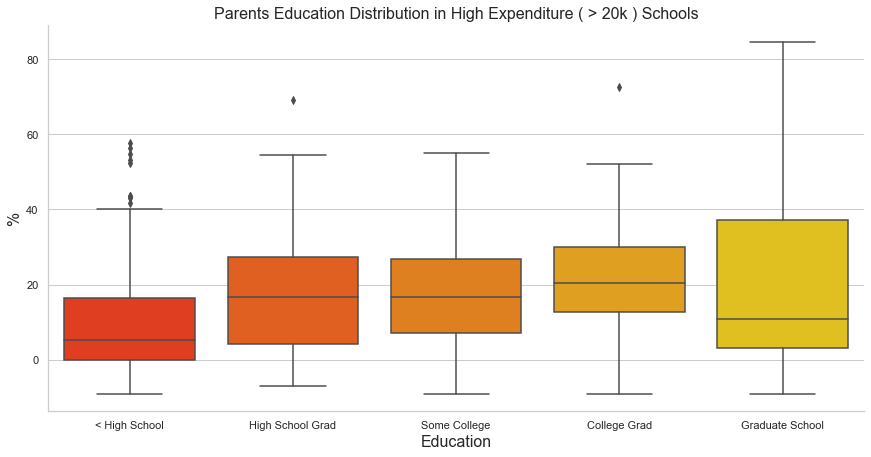

In [30]:
# Subset columns of interest
high_exp = high_expenditure[['< High School', 'High School Grad','Some College', 'College Grad', 'Graduate School']]

# Plot distribution
plt.figure(figsize=(12,8))
sns.set_theme(style="whitegrid")
sns.catplot(data=high_exp, kind="box", height=6, aspect=2, palette='autumn')
_ = plt.title('Parents Education Distribution in High Expenditure ( > 20k ) Schools', fontsize=16)
_ = plt.xlabel('Education', fontsize=16)
_ = plt.ylabel('%', fontsize=16)

<Figure size 864x576 with 0 Axes>

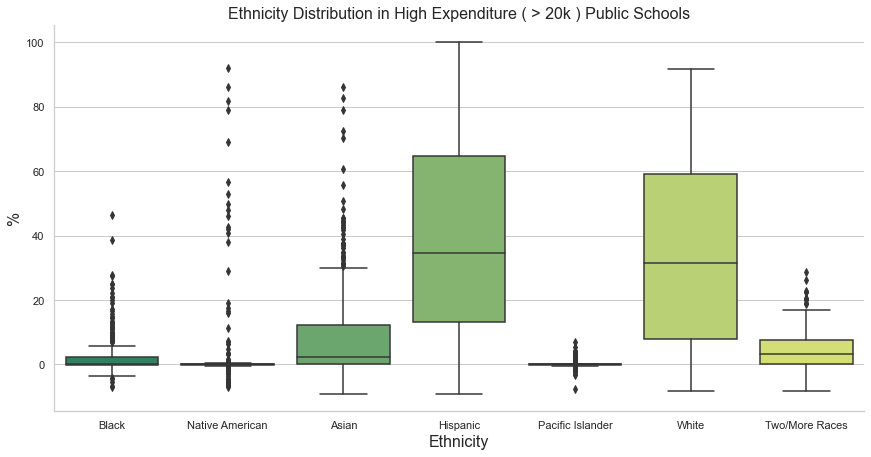

In [31]:
# Subset columns of interest
high_exp1 = high_expenditure[['Black', 'Native American', 'Asian', 'Hispanic', 'Pacific Islander', 'White', 'Two/More Races']]

# Plot distribution
plt.figure(figsize=(12,8))
sns.set_theme(style="whitegrid")
sns.catplot(data=high_exp1, kind="box", height=6, aspect=2, palette="summer")
_ = plt.title('Ethnicity Distribution in High Expenditure ( > 20k ) Public Schools', fontsize=16)
_ = plt.xlabel('Ethnicity', fontsize=16)
_ = plt.ylabel('%', fontsize=16)

----------

## 4. Expense per ADA



- **High Expense Per ADA Investigation:**



    - There are 183 schools with expense per ada higher than $20,000.


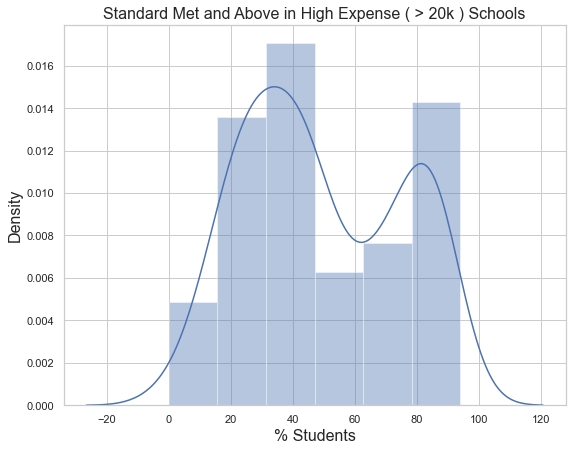

In [32]:
# Filtering current expense per ada higher than 20k
high_expense = language[language['Current Expense Per ADA'] > 20000]

# Distribution plot
plt.figure(figsize=(9,7))
sns.distplot(high_expense['Percentage Standard Met and Above'])
plt.title('Standard Met and Above in High Expense ( > 20k ) Schools', fontsize = 16)

# Adding labels
_ = plt.xlabel('% Students', fontsize=16)
_ = plt.ylabel('Density', fontsize=16)

plt.show()

<Figure size 864x576 with 0 Axes>

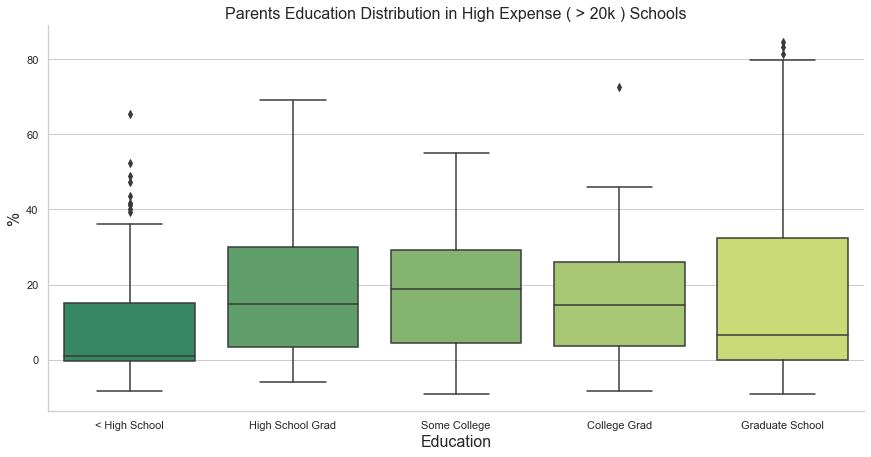

In [33]:
# Subset columns of interest
high_exp1 = high_expense[['< High School', 'High School Grad','Some College', 'College Grad', 'Graduate School']]

# Plot distribution
plt.figure(figsize=(12,8))
sns.set_theme(style="whitegrid")
sns.catplot(data=high_exp1, kind="box", height=6, aspect=2, palette="summer")
_ = plt.title('Parents Education Distribution in High Expense ( > 20k ) Schools', fontsize=16)
_ = plt.xlabel('Education', fontsize=16)
_ = plt.ylabel('%', fontsize=16)

<Figure size 864x576 with 0 Axes>

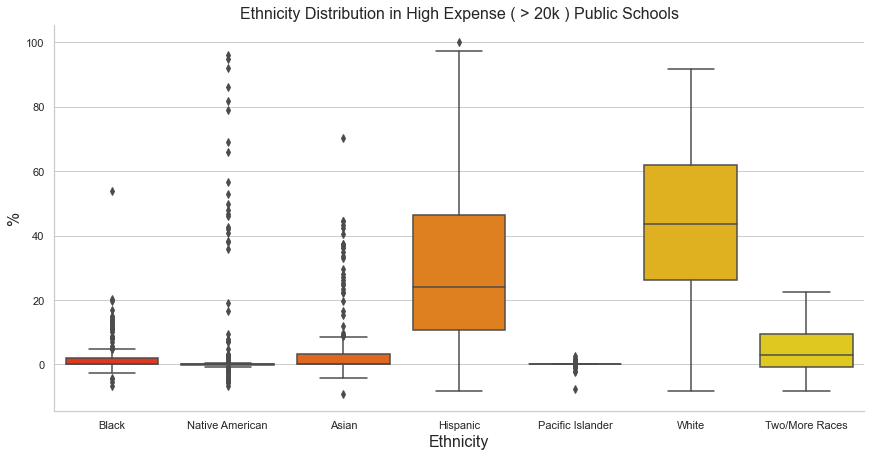

In [34]:
# Subset columns of interest
high_exp2 = high_expense[['Black', 'Native American', 'Asian', 'Hispanic', 'Pacific Islander', 'White', 'Two/More Races']]

# Plot distribution
plt.figure(figsize=(12,8))
sns.set_theme(style="whitegrid")
sns.catplot(data=high_exp2, kind="box", height=6, aspect=2, palette="autumn")
_ = plt.title('Ethnicity Distribution in High Expense ( > 20k ) Public Schools', fontsize=16)
_ = plt.xlabel('Ethnicity', fontsize=16)
_ = plt.ylabel('%', fontsize=16)

------------

### Replacing extreme values with 95th percentile for the following variables
- Revenue per pupil
- Expenditure per pupil
- Expense per ADA

In [35]:
# finding 90th for each variable
revenue_per = language['Total Revenue per Pupil'].quantile(0.95)
expenditure_per = language['Total Expenditures per Pupil'].quantile(0.95)
ada_expense_per = language['Current Expense Per ADA'].quantile(0.95).round(2)

# print values
print('Total Revenue per Pupil 97th percentile: ', revenue_per)
print('Total Expenditure per Pupil 97th percentile: ', expenditure_per)
print('Total ADA Expense per Pupil 95th percentile: ', ada_expense_per)

Total Revenue per Pupil 97th percentile:  18252.0
Total Expenditure per Pupil 97th percentile:  18385.0
Total ADA Expense per Pupil 95th percentile:  16405.57


In [36]:
# Replace values above x with 95th percentile
language['Total Revenue per Pupil'] = language['Total Revenue per Pupil'].map(
    lambda x: revenue_per if x > 20000 else x).round(2)
language['Total Expenditures per Pupil'] = language['Total Expenditures per Pupil'].map(
    lambda x: expenditure_per if x > 20000 else x).round(2)
language['Current Expense Per ADA'] = language['Current Expense Per ADA'].map(
    lambda x: ada_expense_per if x > 20000 else x).round(2)

--------

## Correlation matrix
- Look at correlation for each variable in the dataframe
    - Use Pearson correlation heatmap

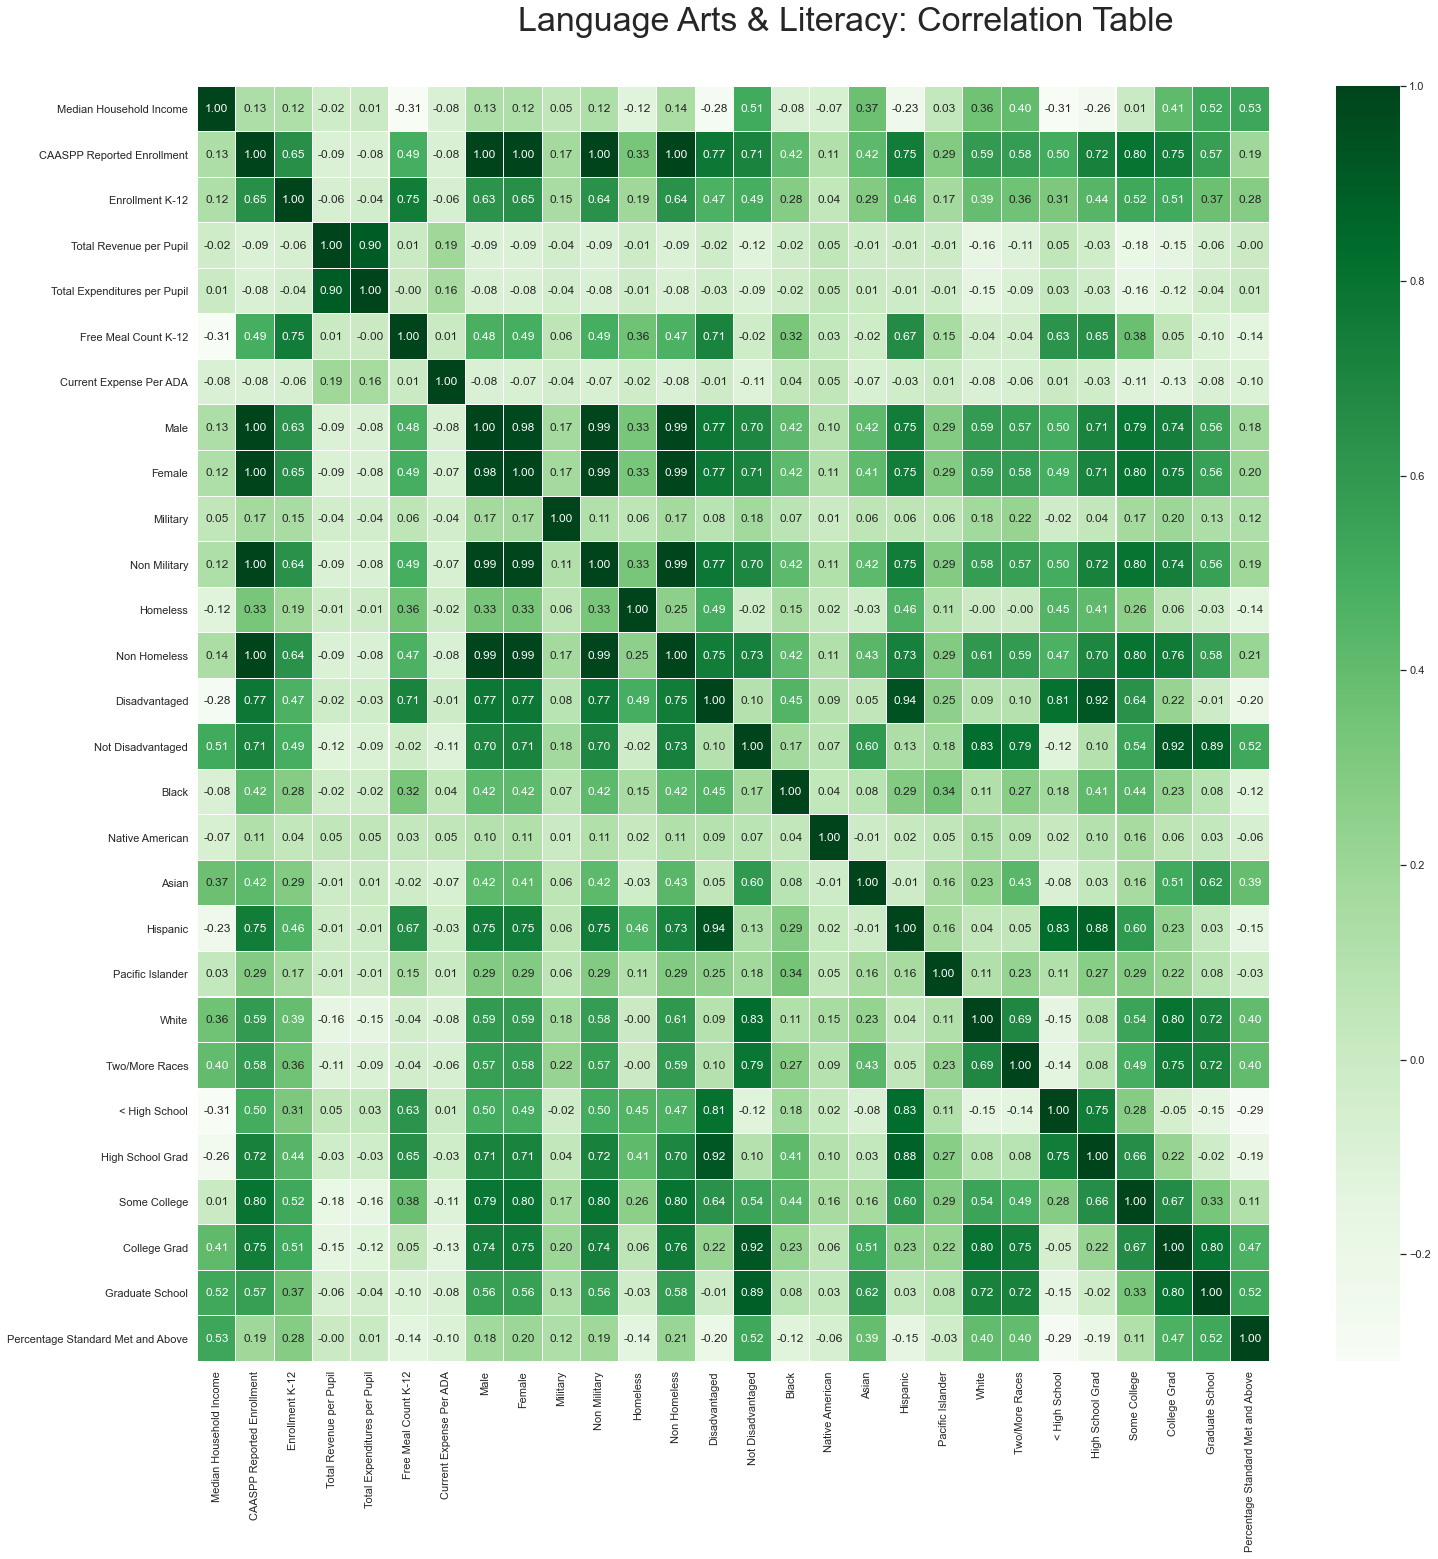

In [37]:
# Run correlation on table constructed with count instead of percentage values
corrmat = table.corr()
f, ax = plt.subplots(figsize=(24, 22))
hm = sns.heatmap(round(corrmat,2), annot=True, ax=ax, cmap="Greens",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Language Arts & Literacy: Correlation Table', fontsize=34)



# # Run correlation on table constructed with count instead of percentage values
# corrmat = table1.corr()
# f, ax = plt.subplots(figsize=(24, 22))
# hm = sns.heatmap(round(corrmat,2), annot=True, ax=ax, cmap="Greens",fmt='.2f',
#                  linewidths=.05)
# f.subplots_adjust(top=0.93)
# t= f.suptitle('Mathematics: Correlation Table', fontsize=34)

--------

## Pairwise relationship between dependent variable and independent variables



- **Dependent variable**: 
    - 'Percentage Standard Met and Above'
- **Independent variables**:
    - 'Median Household Income', 
    - 'CAASPP Reported Enrollment', 'Enrollment K-12', 
    - 'Total Revenue per Pupil', 'Total Expenditures per Pupil', 
    - 'Free Meal Count K-12', 'Current Expense Per ADA', 
    - 'Male', 'Female', 
    - 'Military', 'Non Military',
    - 'Homeless', 'Non Homeless', '
    - Disadvantaged', 'Not Disadvantaged',
    - 'Black', 'Native American', 'Asian', 'Hispanic', 'Pacific Islander','White', 'Two/More Races', 
    - '< High School', 'High School Grad','Some College', 'College Grad', 'Graduate School'

## Bar Plots of Pairwise Relationship between Dependent and Independent Variables

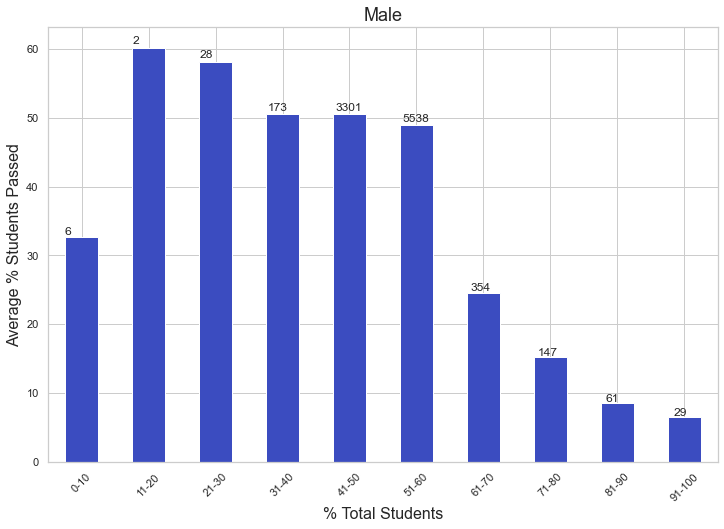

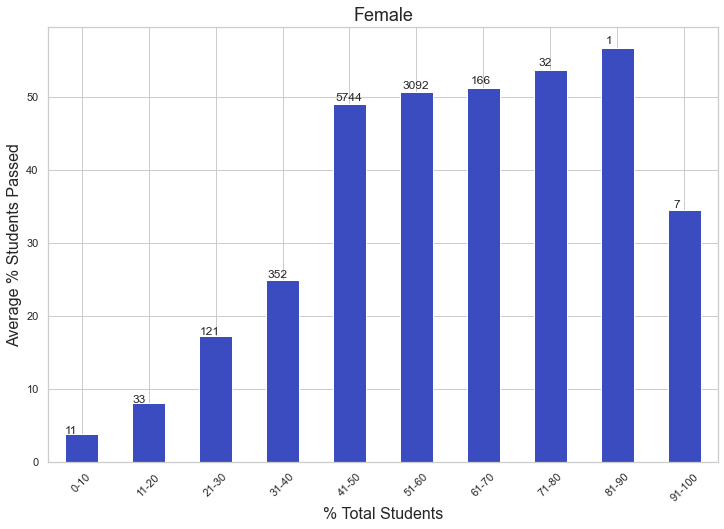

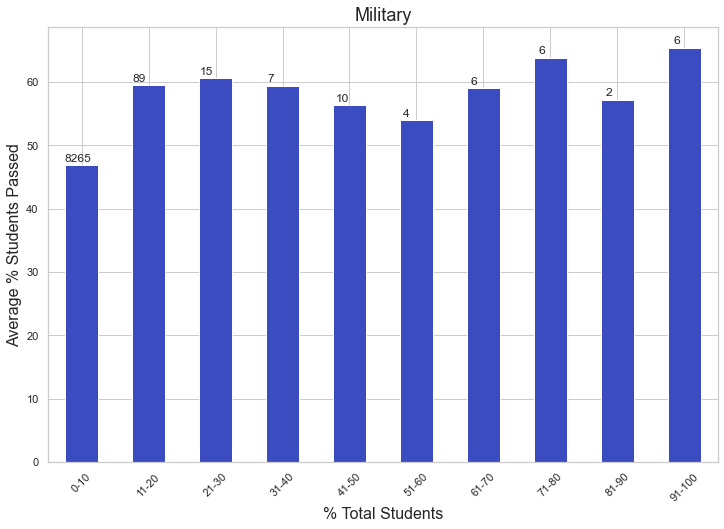

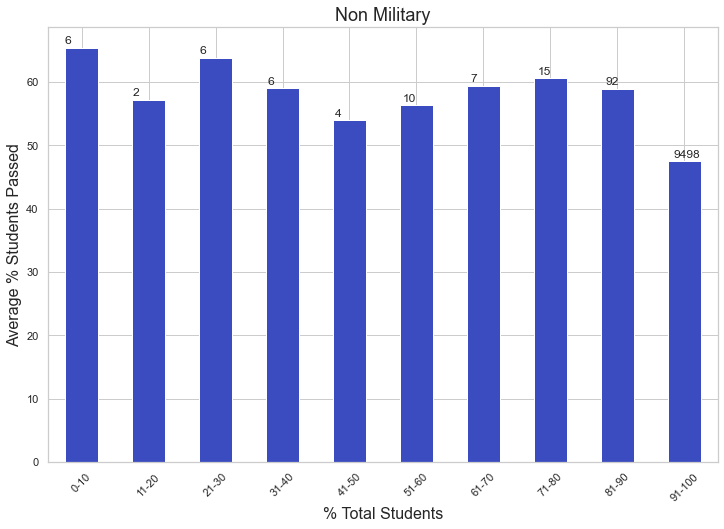

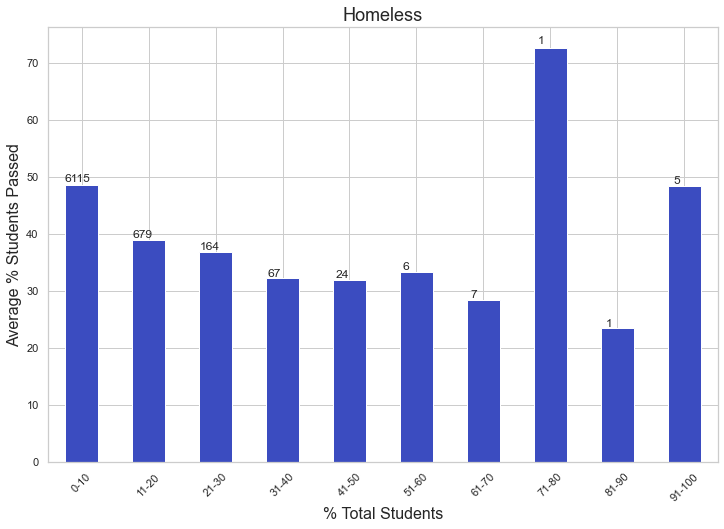

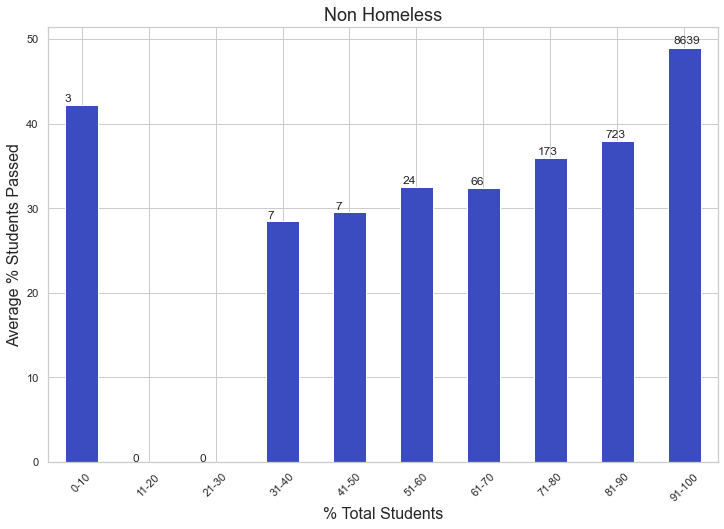

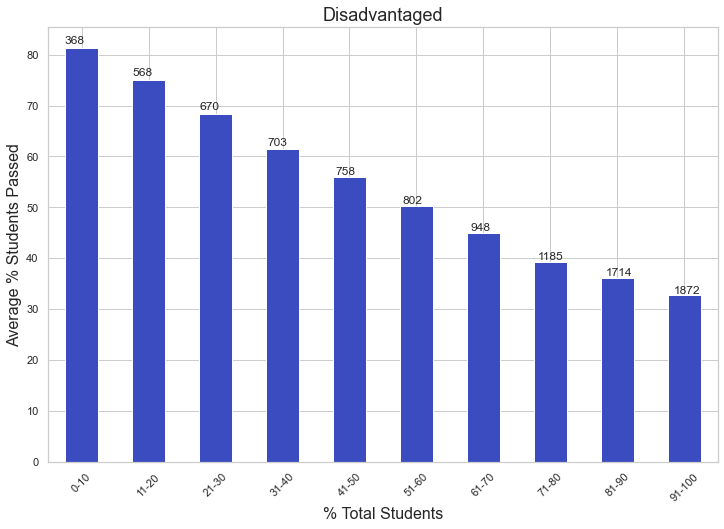

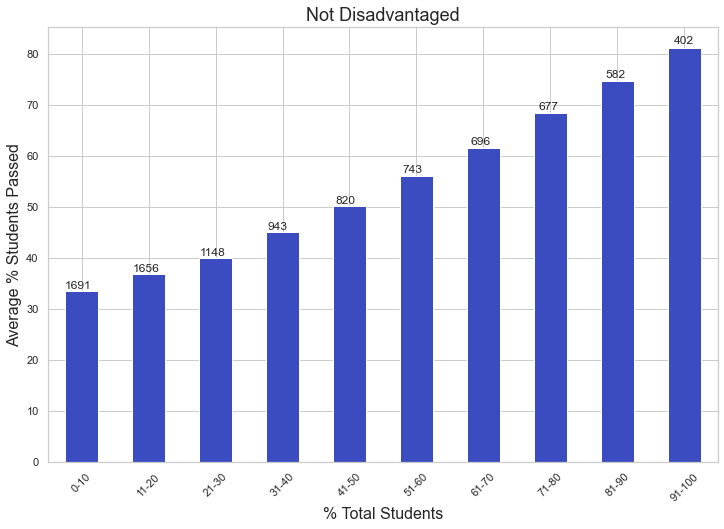

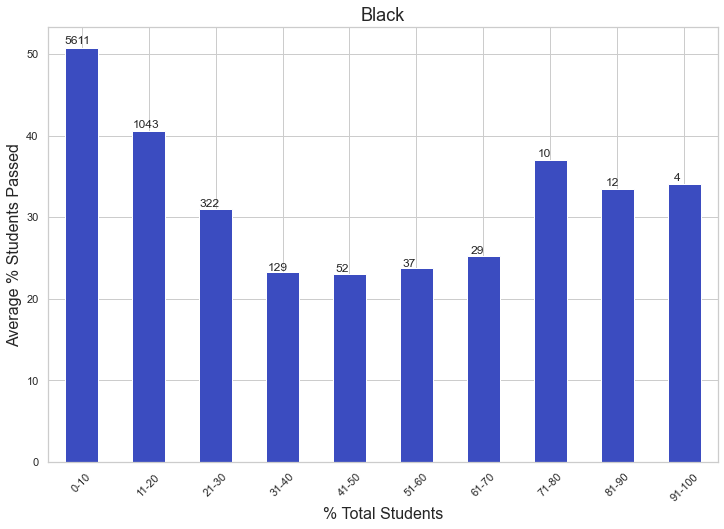

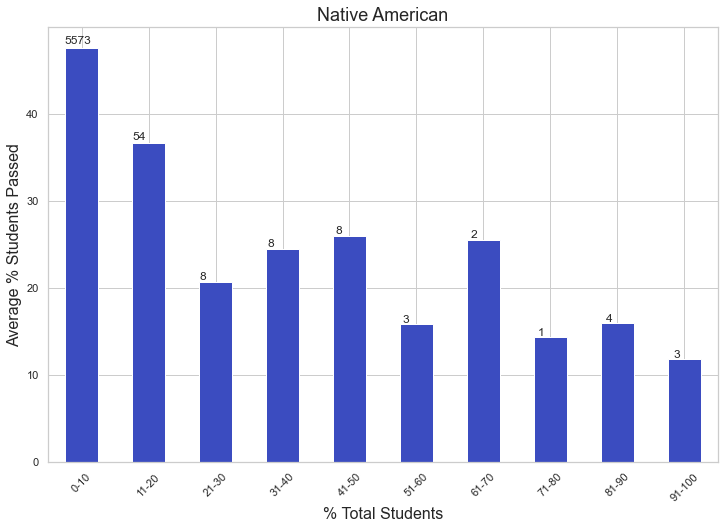

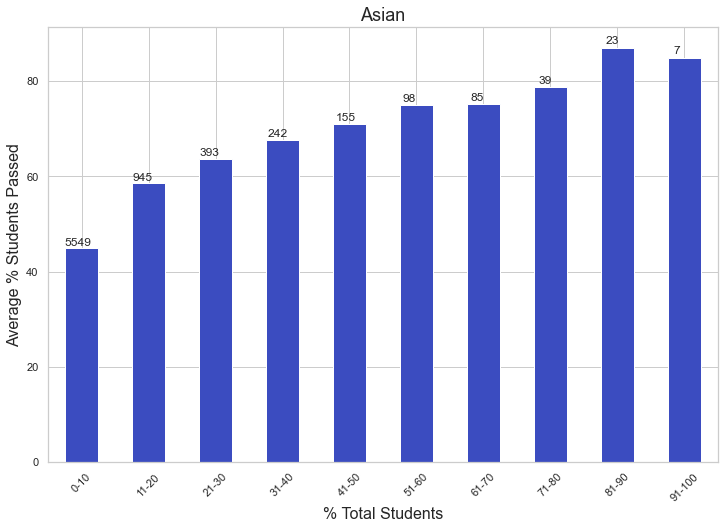

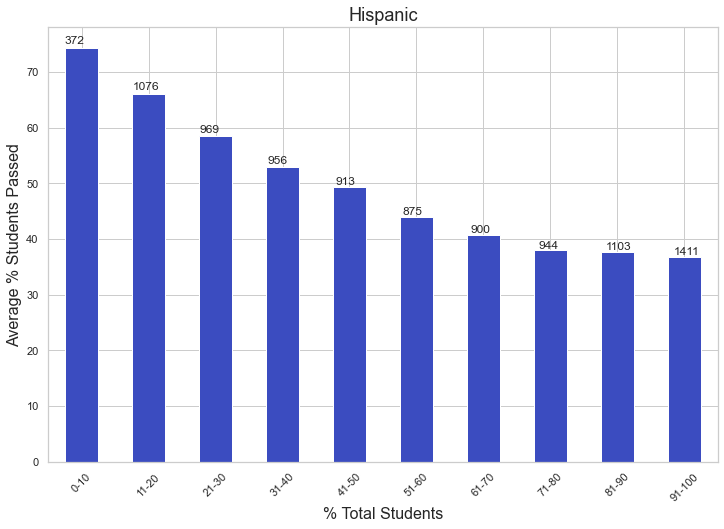

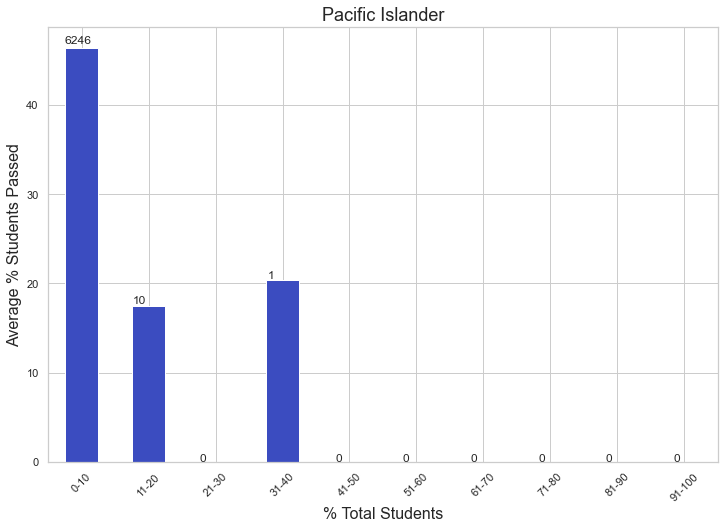

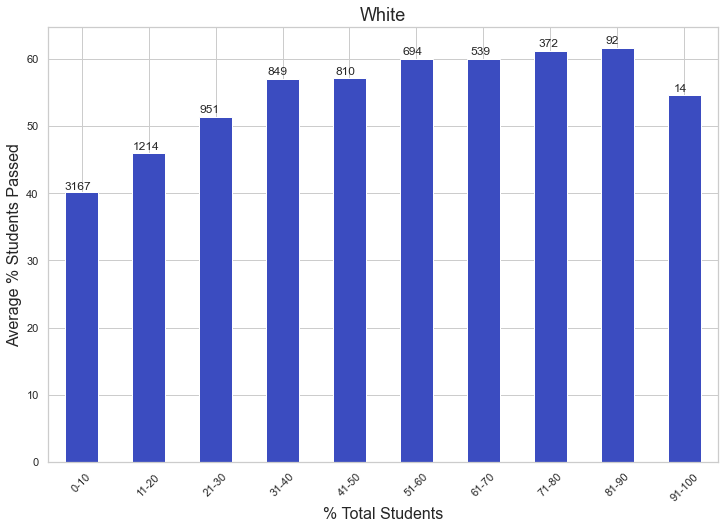

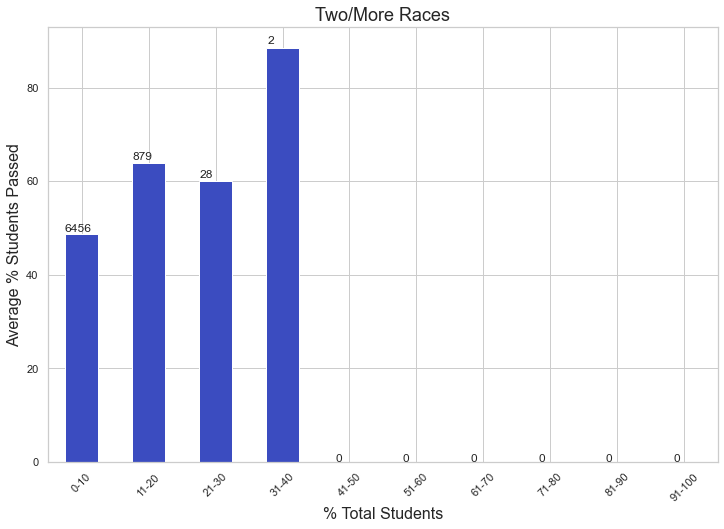

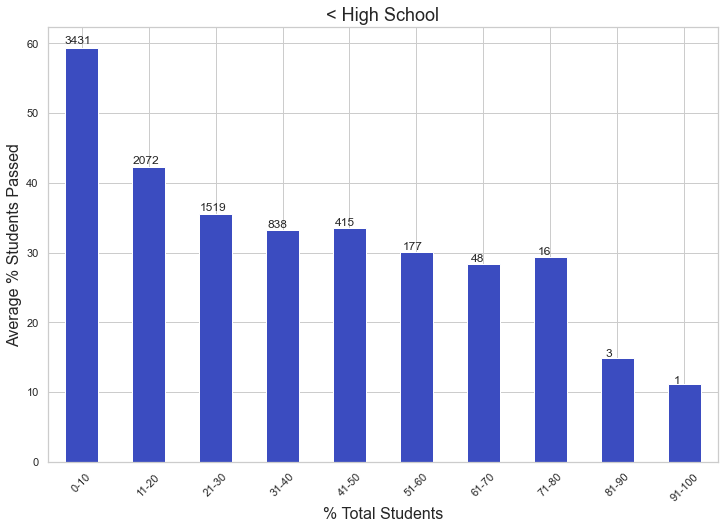

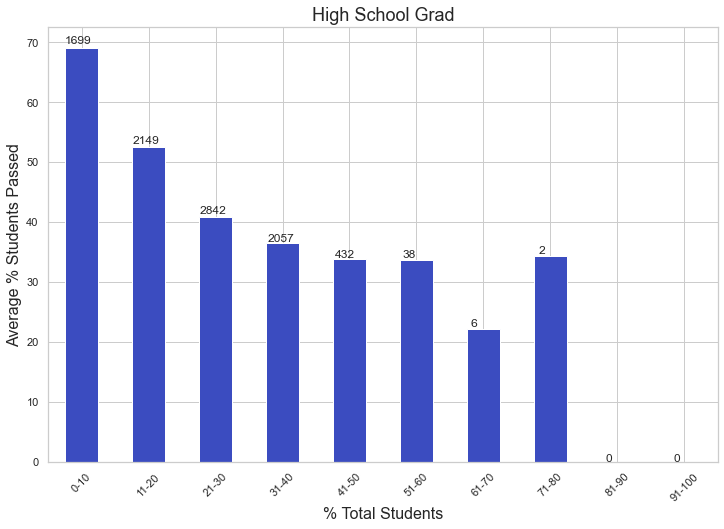

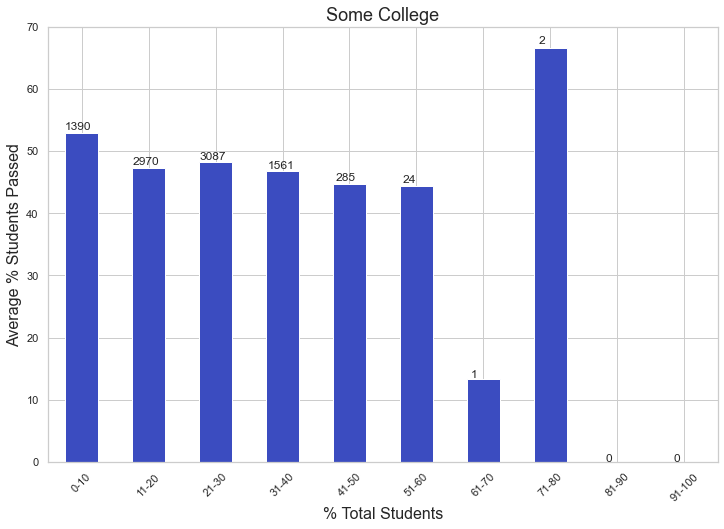

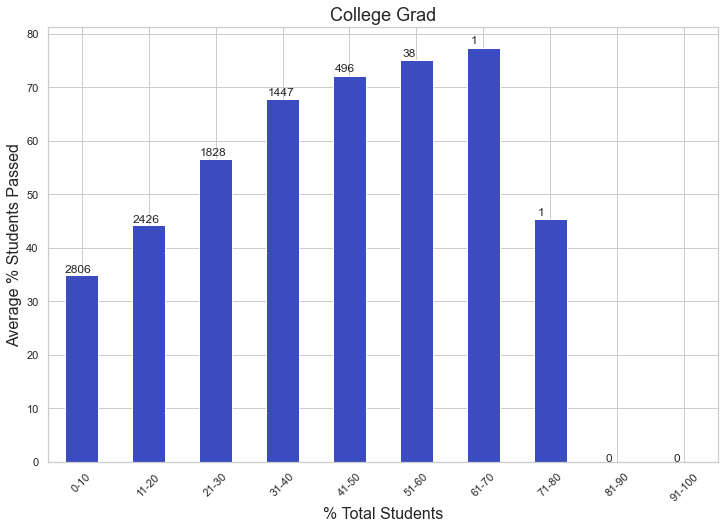

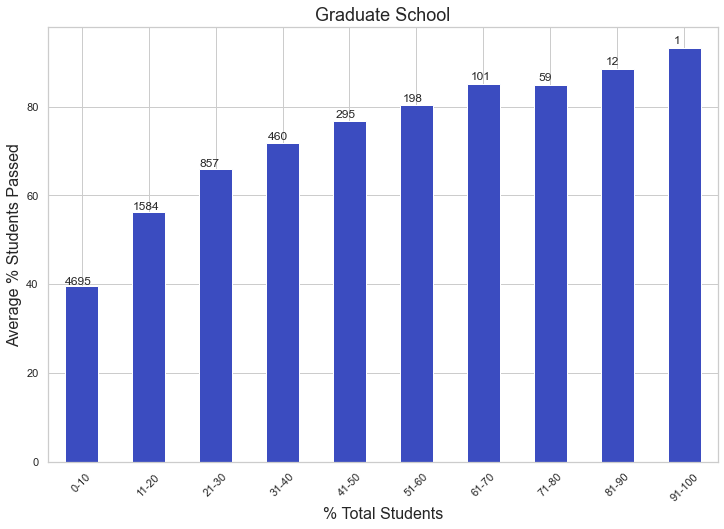

In [38]:
def bar_plot(df, var):
    bins = pd.cut(df[var], [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], include_lowest=True)

    # Groupby Y and agg the functions to pass on Y using X
    grouped_df = df.groupby(bins)['Percentage Standard Met and Above'].agg(['count', 'mean'])

    # set labels
    labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
    
    # Plot
    ax = grouped_df.plot.bar(y='mean', figsize=(12,8), legend=False, colormap='coolwarm')
    ax.set_xticklabels(labels, rotation=45)

    # Annotate bars
    for count, p in zip(grouped_df['count'], ax.patches):
        ax.annotate(count, (p.get_x() * 1.01, p.get_height() * 1.01))

    # Label axis
    plt.title(var, fontsize = 18)
    _ = plt.xlabel('% Total Students', fontsize=16)
    _ = plt.ylabel('Average % Students Passed', fontsize=16)

# Create list to loop through
demographics = ['Male', 'Female', 'Military', 'Non Military', 'Homeless', 'Non Homeless',
       'Disadvantaged', 'Not Disadvantaged', 'Black', 'Native American', 'Asian', 'Hispanic',
       'Pacific Islander', 'White', 'Two/More Races', '< High School',
       'High School Grad', 'Some College', 'College Grad', 'Graduate School']

for var in demographics:
    bar_plot(language, var)

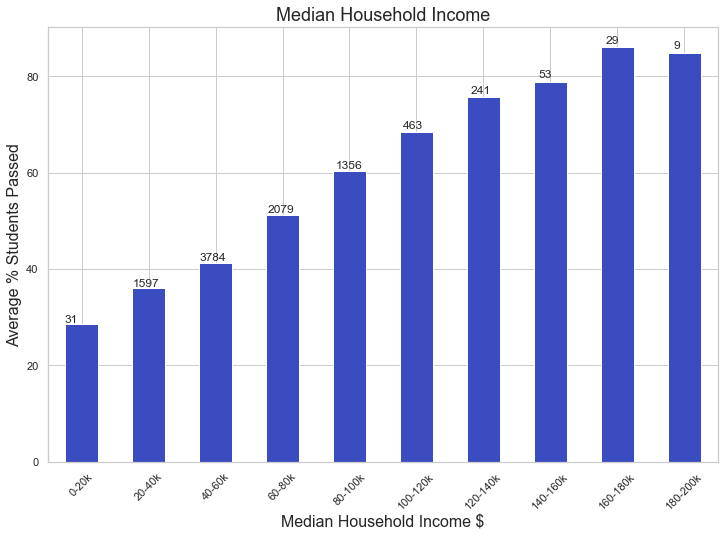

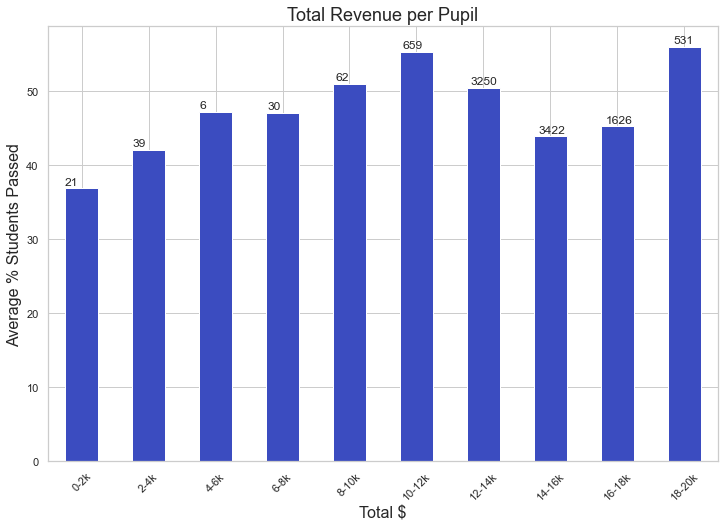

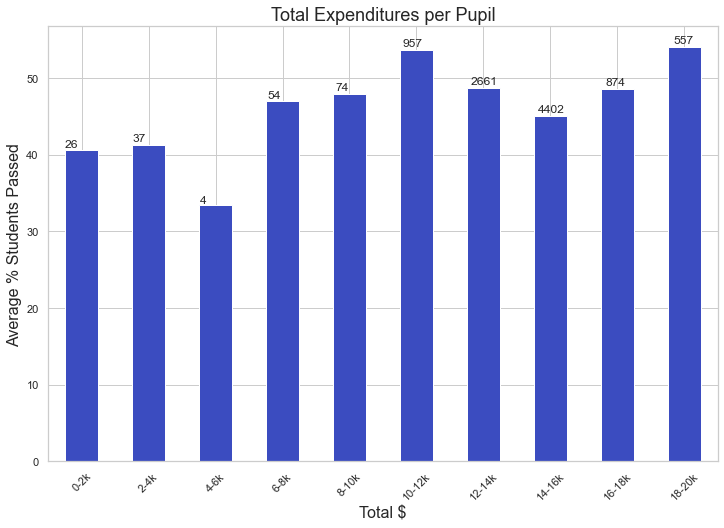

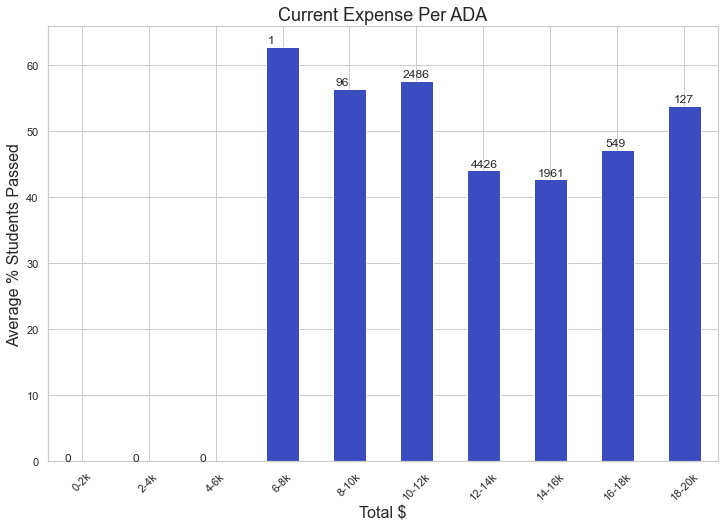

In [39]:
# Create bar plots for 'Median Household Income'

bins = pd.cut(language['Median Household Income'], [0, 20000, 40000, 60000, 80000, 100000, 120000, 
                                                    140000, 160000, 180000, 200000], include_lowest=True)

# Groupby Y and agg the functions to pass on Y using X
grouped_df = language.groupby(bins)['Percentage Standard Met and Above'].agg(['count', 'mean'])

# set labels
labels = ['0-20k', '20-40k', '40-60k', '60-80k', '80-100k', '100-120k', '120-140k', '140-160k', '160-180k', '180-200k']
    
# Plot
ax = grouped_df.plot.bar(y='mean', figsize=(12,8), legend=False, colormap='coolwarm')
ax.set_xticklabels(labels, rotation=45)

# Annotate bars
for count, p in zip(grouped_df['count'], ax.patches):
    ax.annotate(count, (p.get_x() * 1.01, p.get_height() * 1.01))

# Label axis
plt.title('Median Household Income', fontsize = 18)
_ = plt.xlabel('Median Household Income $', fontsize=16)
_ = plt.ylabel('Average % Students Passed', fontsize=16)




# function to construct bar plot of funds
def bar_plot_fund(df, var):
    bins = pd.cut(df[var], [0, 2000, 4000, 6000, 8000, 10000, 12000, 14000, 16000, 18000, 20000], include_lowest=True)

    # Groupby Y and agg the functions to pass on Y using X
    grouped_df = df.groupby(bins)['Percentage Standard Met and Above'].agg(['count', 'mean'])

    # set labels
    labels = ['0-2k', '2-4k', '4-6k', '6-8k', '8-10k', '10-12k', '12-14k', '14-16k', '16-18k', '18-20k']
    
    # Plot
    ax = grouped_df.plot.bar(y='mean', figsize=(12,8), legend=False, colormap='coolwarm')
    ax.set_xticklabels(labels, rotation=45)

    # Annotate bars
    for count, p in zip(grouped_df['count'], ax.patches):
        ax.annotate(count, (p.get_x() * 1.01, p.get_height() * 1.01))

    # Label axis
    plt.title(var, fontsize = 18)
    _ = plt.xlabel('Total $', fontsize=16)
    _ = plt.ylabel('Average % Students Passed', fontsize=16)
    

# Define list to iterate over
demographics = ['Total Revenue per Pupil', 'Total Expenditures per Pupil', 'Current Expense Per ADA']


# Call for loop
for var in demographics:
    bar_plot_fund(language, var)

In [40]:
# # Create bar plots for 'Free Meal Count K-12'

# bins = pd.cut(language['Free Meal Count K-12'], [0, 50, 100, 200, 300, 500, 700, 900, 1100, 2900], include_lowest=True)

# # Groupby Y and agg the functions to pass on Y using X
# grouped_df = language.groupby(bins)['Percentage Standard Met and Above'].agg(['count', 'mean'])

# # set labels
# labels = ['0-50', '50-100', '100-200', '200-300', '300-500', '500-700', '700-900', '900-1100', '1100-2200']
    
# # Plot
# ax = grouped_df.plot.bar(y='mean', figsize=(12,8), legend=False)
# ax.set_xticklabels(labels, rotation=45)

# # Annotate bars
# for count, p in zip(grouped_df['count'], ax.patches):
#     ax.annotate(count, (p.get_x() * 1.01, p.get_height() * 1.01))

# # Label axis
# plt.title('Free Meal Count K-12', fontsize = 18)
# _ = plt.xlabel('Number of Free Meal', fontsize=16)
# _ = plt.ylabel('Average % Students Passed', fontsize=16)

--------

# Pairwise relationship between highly correlated variables


## Disadvantaged:
- Ethinicity
- Parents education
- Income

      

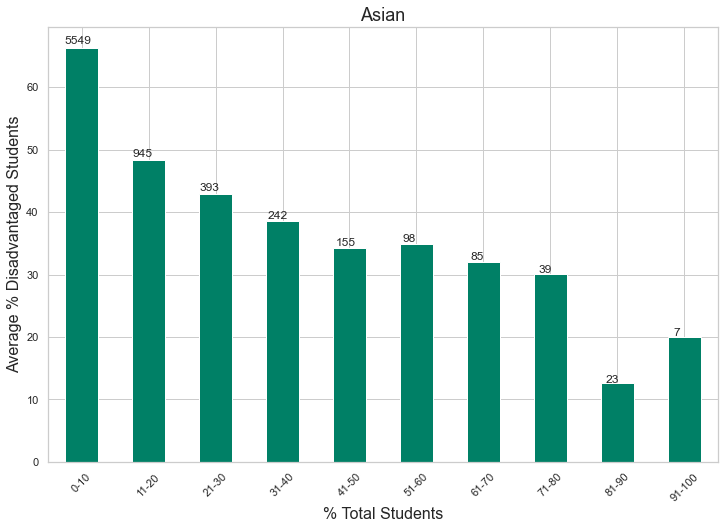

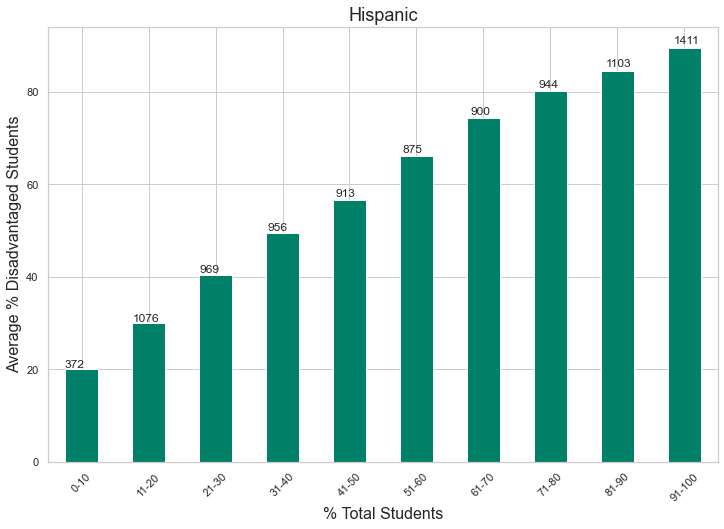

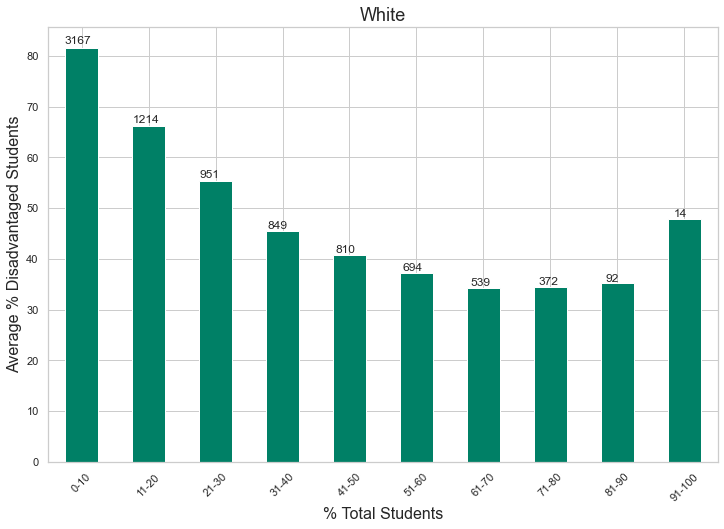

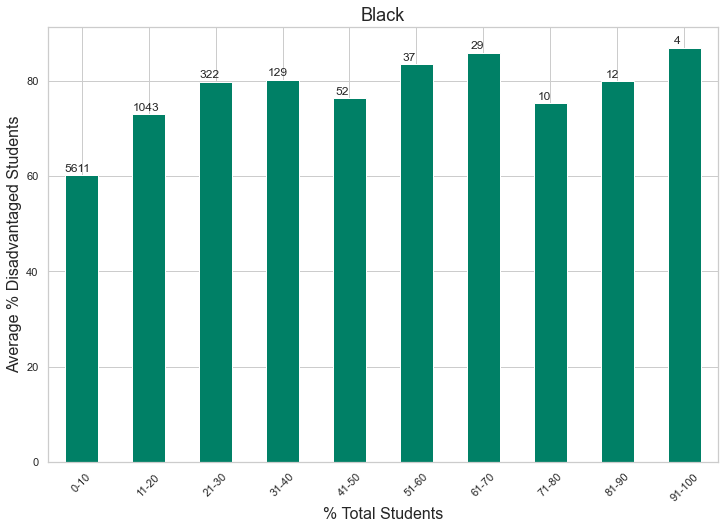

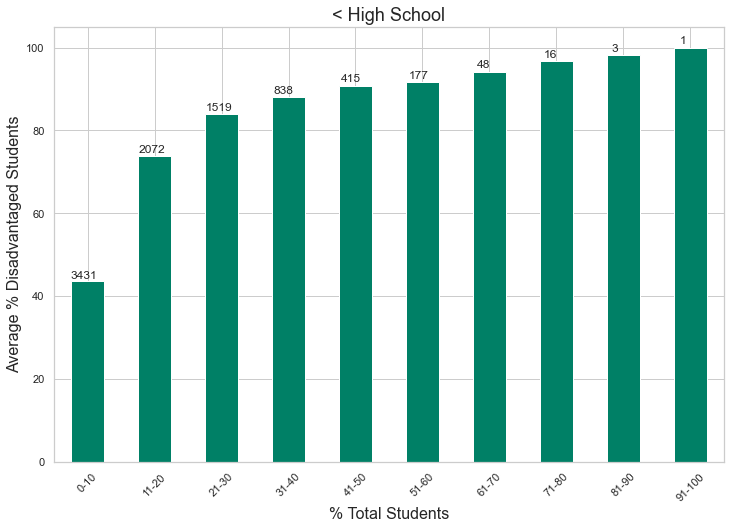

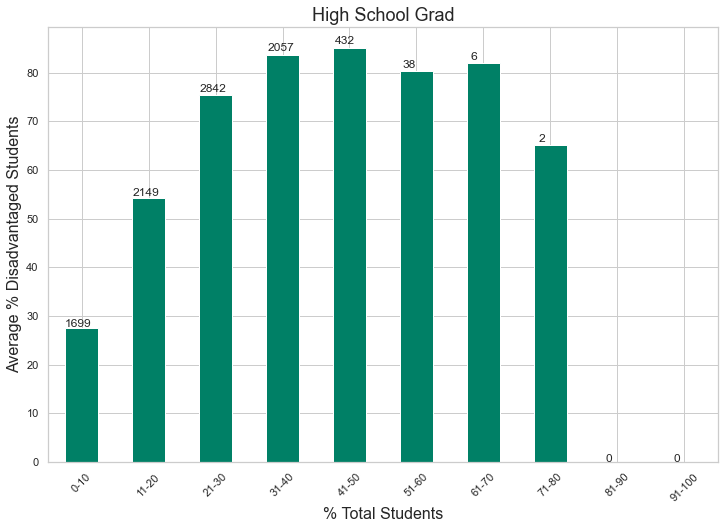

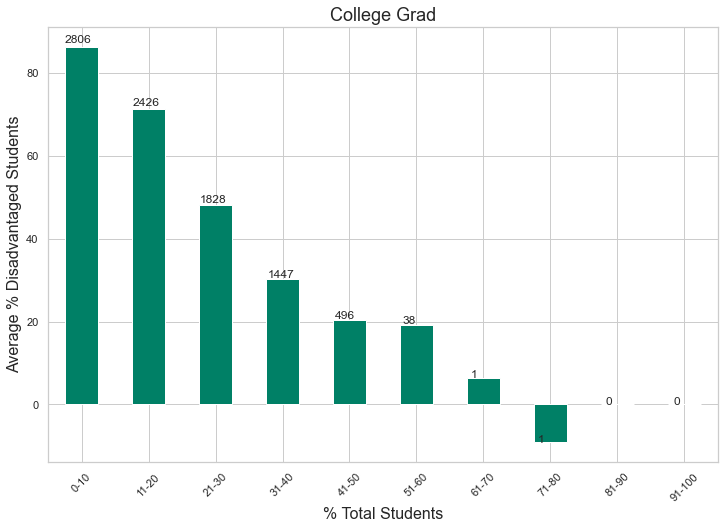

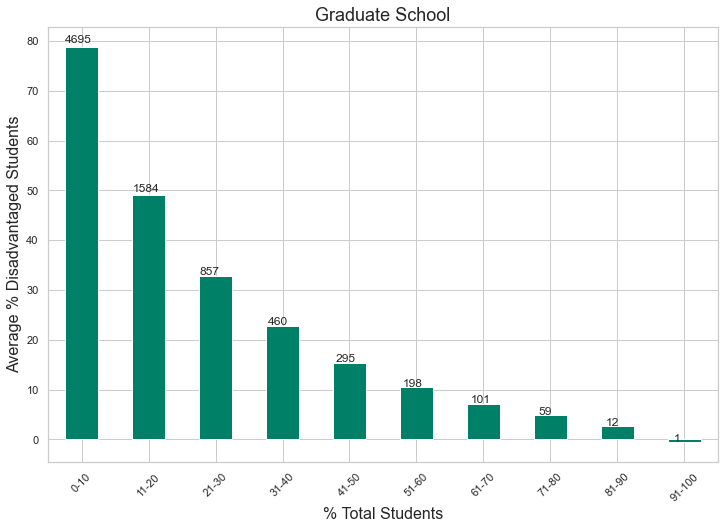

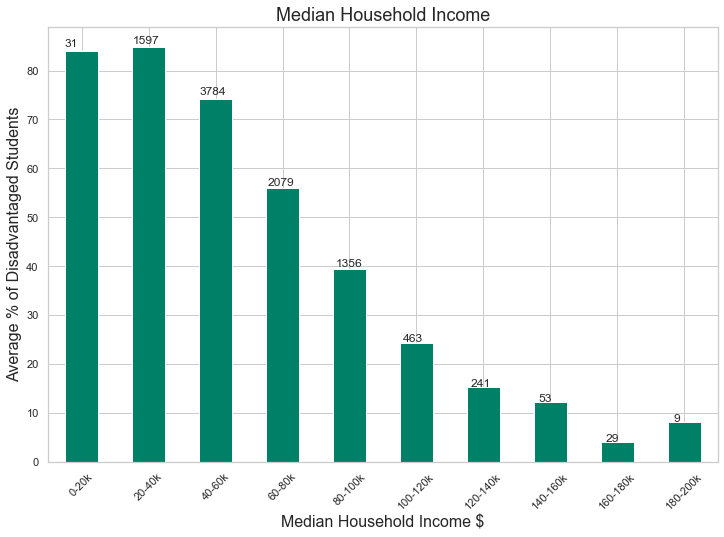

In [41]:
def bar_plot_Dis(df, var):
    bins = pd.cut(df[var], [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], include_lowest=True)

    # Groupby Y and agg the functions to pass on Y using X
    grouped_df = df.groupby(bins)['Disadvantaged'].agg(['count', 'mean'])

    # set labels
    labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
    
    # Plot
    ax = grouped_df.plot.bar(y='mean', figsize=(12,8), legend=False, colormap='summer')
    ax.set_xticklabels(labels, rotation=45)

    # Annotate bars
    for count, p in zip(grouped_df['count'], ax.patches):
        ax.annotate(count, (p.get_x() * 1.01, p.get_height() * 1.01))

    # Label axis
    plt.title(var, fontsize = 18)
    _ = plt.xlabel('% Total Students', fontsize=16)
    _ = plt.ylabel('Average % Disadvantaged Students', fontsize=16)

# Create list to loop through
demographics = ['Asian', 'Hispanic', 'White', 'Black', 
       '< High School', 'High School Grad', 'College Grad', 'Graduate School']

for var in demographics:
    bar_plot_Dis(language, var)
    
    

    
# Create bar plots for 'Median Household Income'

bins = pd.cut(language['Median Household Income'], [0, 20000, 40000, 60000, 80000, 100000, 120000, 
                                                    140000, 160000, 180000, 200000], include_lowest=True)

# Groupby Y and agg the functions to pass on Y using X
grouped_df = language.groupby(bins)['Disadvantaged'].agg(['count', 'mean'])

# set labels
labels = ['0-20k', '20-40k', '40-60k', '60-80k', '80-100k', '100-120k', '120-140k', '140-160k', '160-180k', '180-200k']
    
# Plot
ax = grouped_df.plot.bar(y='mean', figsize=(12,8), legend=False, colormap='summer')
ax.set_xticklabels(labels, rotation=45)

# Annotate bars
for count, p in zip(grouped_df['count'], ax.patches):
    ax.annotate(count, (p.get_x() * 1.01, p.get_height() * 1.01))

# Label axis
plt.title('Median Household Income', fontsize = 18)
_ = plt.xlabel('Median Household Income $', fontsize=16)
_ = plt.ylabel('Average % of Disadvantaged Students', fontsize=16)

## Not Disadvantaged:
- Ethinicity
- Parents education
- Income

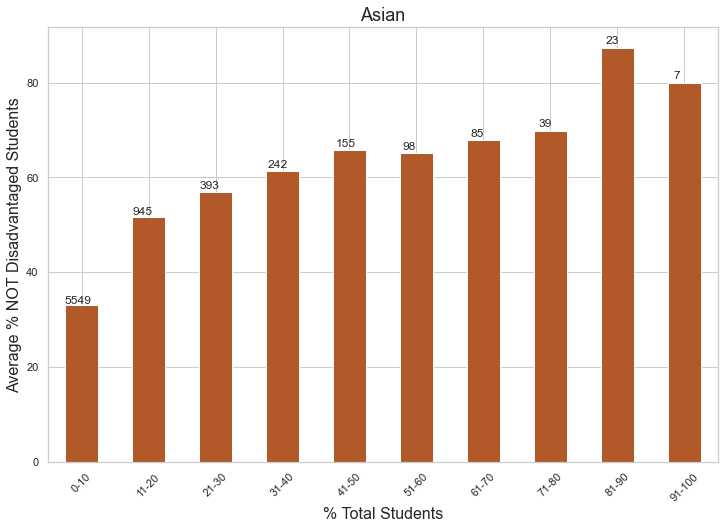

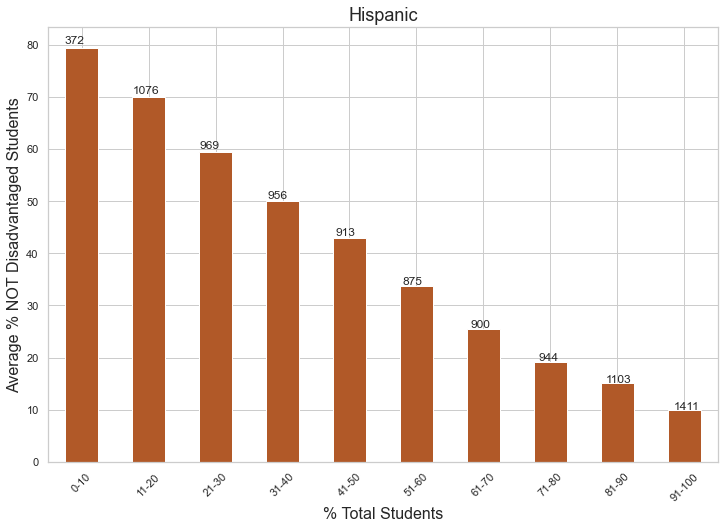

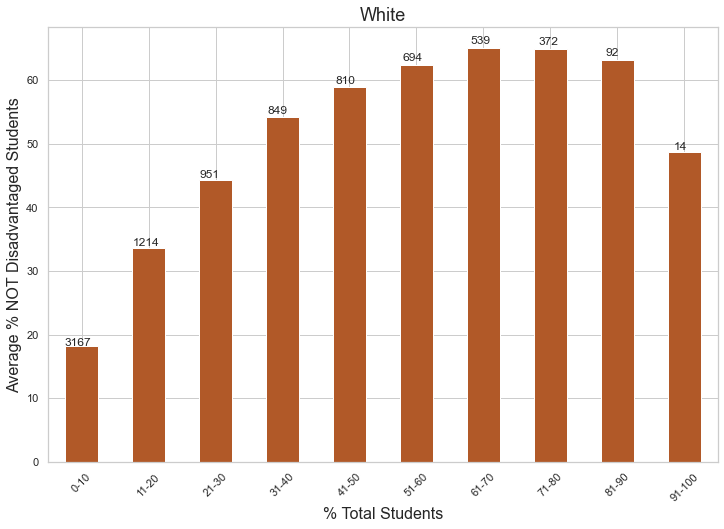

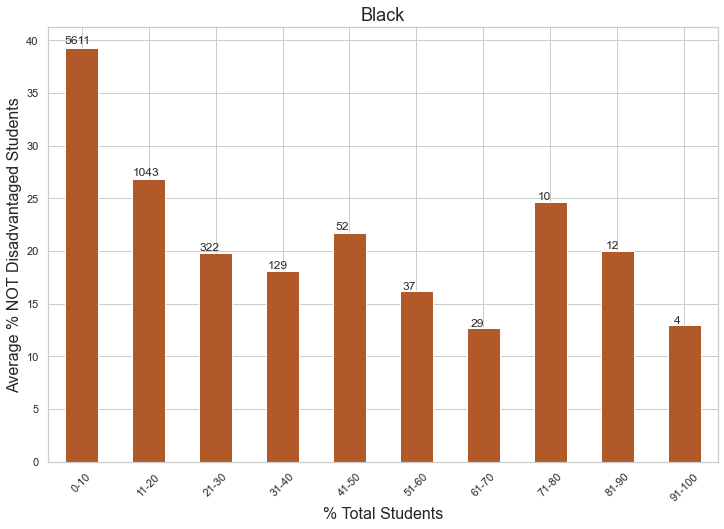

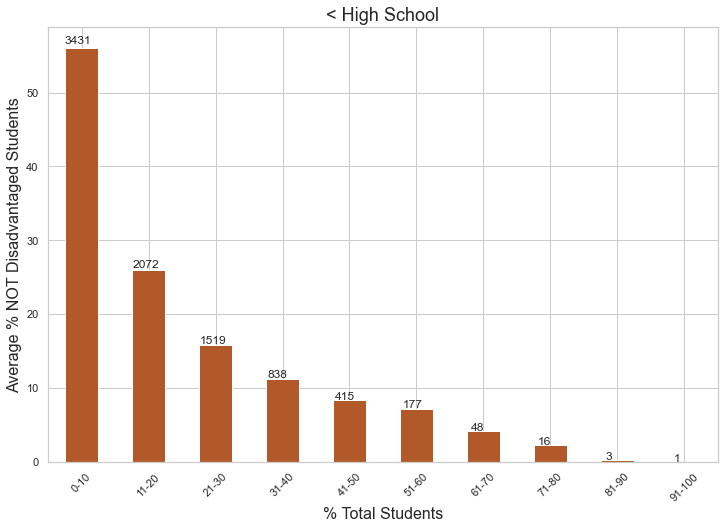

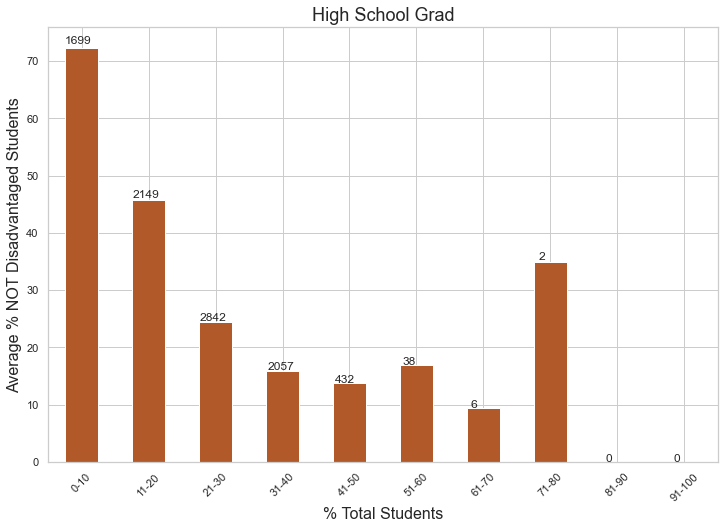

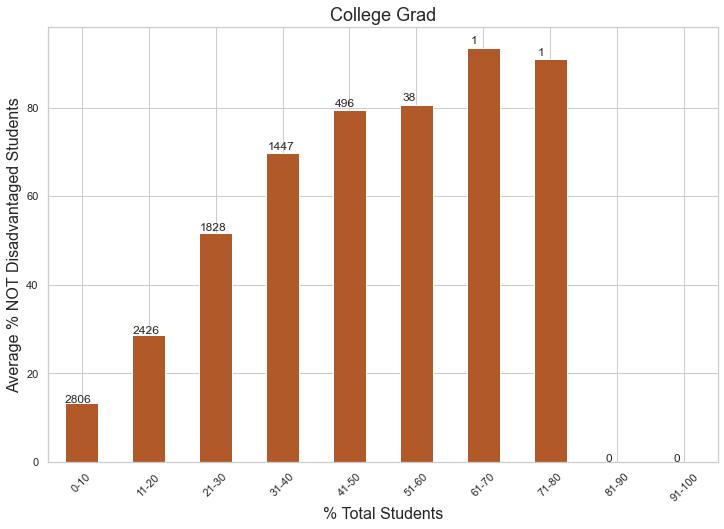

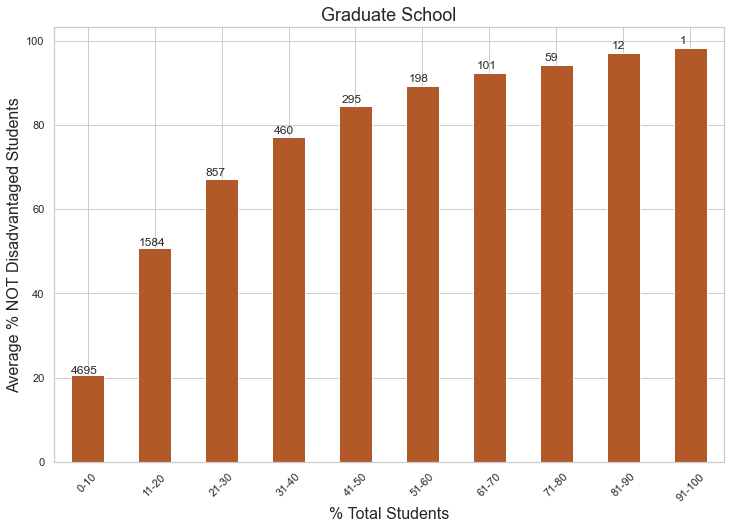

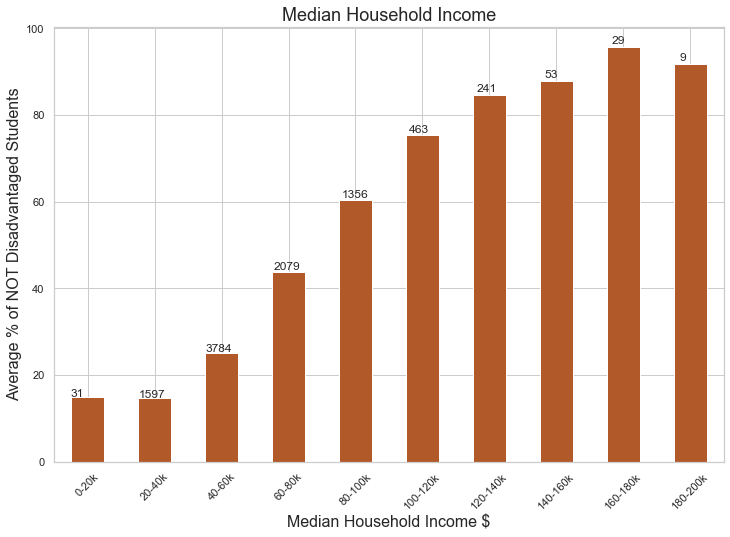

In [42]:
def bar_plot_Dis(df, var):
    bins = pd.cut(df[var], [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], include_lowest=True)

    # Groupby Y and agg the functions to pass on Y using X
    grouped_df = df.groupby(bins)['Not Disadvantaged'].agg(['count', 'mean'])

    # set labels
    labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
    
    # Plot
    ax = grouped_df.plot.bar(y='mean', figsize=(12,8), legend=False, colormap='Paired_r')
    ax.set_xticklabels(labels, rotation=45)

    # Annotate bars
    for count, p in zip(grouped_df['count'], ax.patches):
        ax.annotate(count, (p.get_x() * 1.01, p.get_height() * 1.01))

    # Label axis
    plt.title(var, fontsize = 18)
    _ = plt.xlabel('% Total Students', fontsize=16)
    _ = plt.ylabel('Average % NOT Disadvantaged Students', fontsize=16)

# Create list to loop through
demographics = ['Asian', 'Hispanic', 'White', 'Black', '< High School',
       'High School Grad', 'College Grad', 'Graduate School']

for var in demographics:
    bar_plot_Dis(language, var)
    
    

# Create bar plots for 'Median Household Income'

bins = pd.cut(language['Median Household Income'], [0, 20000, 40000, 60000, 80000, 100000, 120000, 
                                                    140000, 160000, 180000, 200000], include_lowest=True)

# Groupby Y and agg the functions to pass on Y using X
grouped_df = language.groupby(bins)['Not Disadvantaged'].agg(['count', 'mean'])

# set labels
labels = ['0-20k', '20-40k', '40-60k', '60-80k', '80-100k', '100-120k', '120-140k', '140-160k', '160-180k', '180-200k']
    
# Plot
ax = grouped_df.plot.bar(y='mean', figsize=(12,8), legend=False, colormap='Paired_r')
ax.set_xticklabels(labels, rotation=45)

# Annotate bars
for count, p in zip(grouped_df['count'], ax.patches):
    ax.annotate(count, (p.get_x() * 1.01, p.get_height() * 1.01))

# Label axis
plt.title('Median Household Income', fontsize = 18)
_ = plt.xlabel('Median Household Income $', fontsize=16)
_ = plt.ylabel('Average % of NOT Disadvantaged Students', fontsize=16)

## Pairplot: Alternative Visualization of Highly Correlated Variables
- DISADVANTAGED with Hispanic, Median Household Income, High School Grad, Free Meal Count K-12

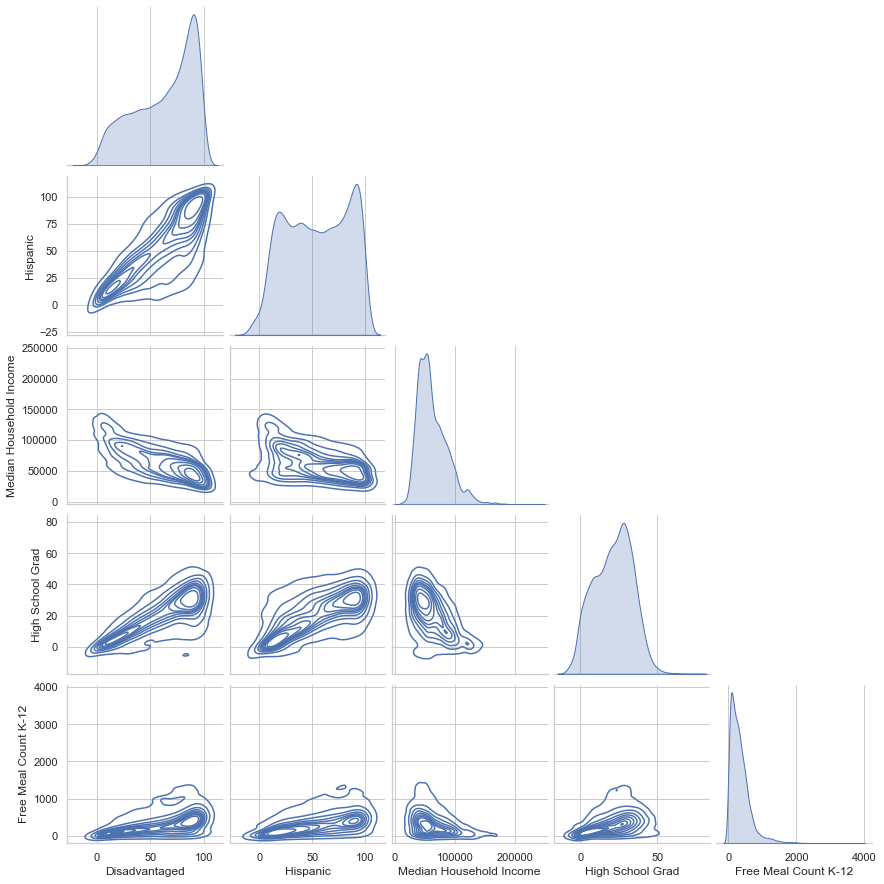

In [43]:
# Filter columns to be in the pairwise plot
pairwise = language[['Disadvantaged', 'Hispanic', 'Median Household Income', 'High School Grad', 'Free Meal Count K-12']]

# Create a pairplot for all numeric variables 
sns.pairplot(pairwise, kind = 'kde', corner=True)
plt.show()

- NOT DISADVANTAGED with White, Median Household Income, College Grad, Free Meal Count K-12

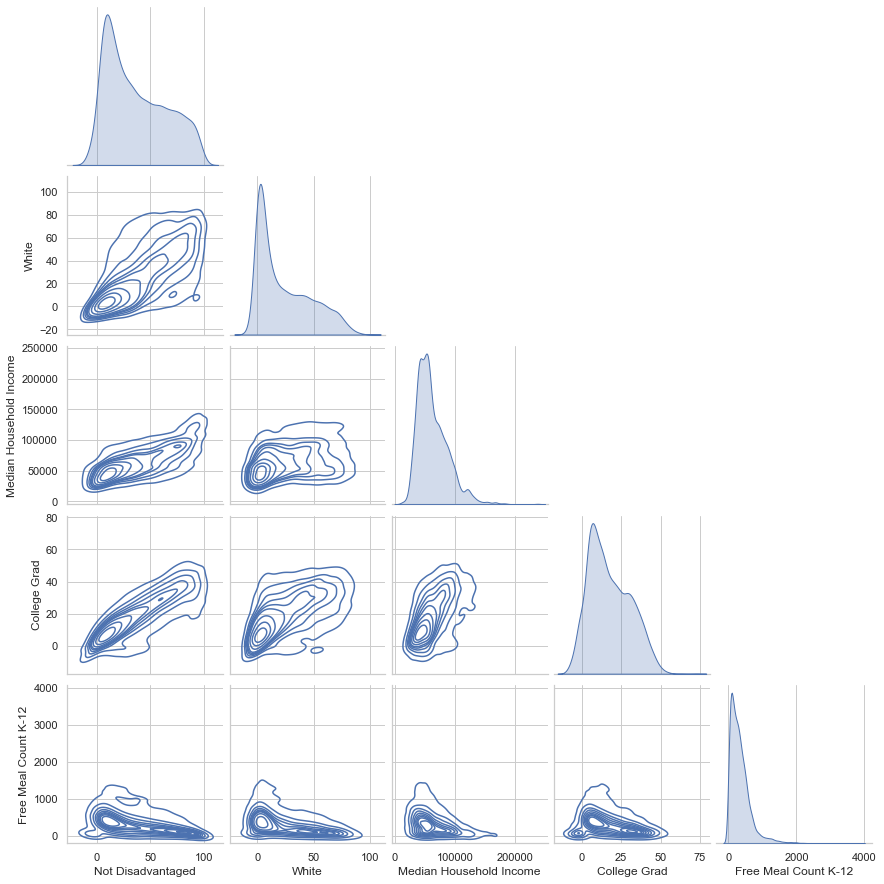

In [44]:
# Filter columns to be in the pairwise plot
pairwise = language[['Not Disadvantaged', 'White', 'Median Household Income', 'College Grad', 'Free Meal Count K-12']]

# Create a pairplot for all numeric variables 
sns.pairplot(pairwise, kind = 'kde', corner=True)
plt.show()

<!-- ### Questions:
- Are there variables that are particularly significant in terms of explaining the answer to your project question?
- Are there significant differences between subgroups in your data that may be relevant to your project aim?
- Are there strong correlations between pairs of independent variables or between an independent and a dependent variable?
- What are the most appropriate tests to use to analyze these relationships? -->

---------

### Using heatmaps to understand the students demographics distribution with location

- Percentage of students who pass the standards
- Disadvantaged and not disadvantage students
- < HS
- College graduate
- Graduate school
- Household income

In [45]:
# map
folium_map = folium.Map(location=[36.778259, -119.417931],
                        zoom_start=7,
                        tiles="OpenStreetMap")
folium_map
# This sets up a basic map of CA
# Tiles options: "OpenStreetMap", "Mapbox Bright","Stamen Toner","Mapbox Control Room","Stamen Terrain"

In [46]:
max_amount = float(language['Percentage Standard Met and Above'].max())

folium_hmap = folium.Map(location=[36.778259, -119.417931],
                        zoom_start=7,
                        tiles="OpenStreetMap")

hm_wide = HeatMap( list(zip(language['Latitude'], language['Longitude'], language['Percentage Standard Met and Above'])),
                   min_opacity=0.2,
                   max_val=max_amount,
                   radius=20, blur=6, 
                   max_zoom=15, 
                 )

folium_hmap.add_child(hm_wide)

---------